## Business Problem
IBM HR Analytics Employee Attrition & Performance is a dataset that contains employee data and their performance and attrition rates. The problem is to predict which employees are likely to leave the company and what factors contribute to employee attrition. This is important for HR departments to better understand why employees leave and take appropriate action to reduce attrition rates.
https://www.kaggle.com/datasets/pavansubhasht/ibm-hr-analytics-attrition-dataset/code?datasetId=1067

## Machine Learning Algorithms
For this problem, we can use several machine learning algorithms to predict employee attrition rates. Some of the algorithms that can be used are Naive Bayes, Logistic Regression, Random Forest, SVM, XGBoost and Neural Networks. These algorithms can be trained on the historical data to predict which employees are likely to leave and what factors contribute to employee attrition. We can also use feature selection techniques to identify which factors are most important in predicting employee attrition rates.

## Proposal
The proposed machine learning project based on the IBM HR Analytics Employee Attrition & Performance dataset will aim to predict employee attrition rates and identify the factors that contribute to employee attrition. We will use various machine learning algorithms and feature selection techniques to predict employee attrition rates.

The project will be evaluated based on its accuracy in predicting employee attrition rates, its ability to identify the most important factors in predicting employee attrition, and its effectiveness in providing actionable insights to HR departments. The project will provide valuable insights to HR departments that can be used to reduce employee attrition rates and improve employee satisfaction.

## 1. Import Libraries

In [ ]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt # plotting
from matplotlib import rc
import numpy as np # linear algebra
import os # accessing directory structure
import pandas as pd
import seaborn as sns
import tensorflow as tf

from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report, roc_auc_score
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import roc_curve, auc

### Connect to Google Drive

In [ ]:
import os
from google.colab import drive
drive.mount('/content/drive')

path = "/content/drive/My Drive"

os.chdir(path)
os.listdir(path)

Mounted at /content/drive


['WA_Fn-UseC_-HR-Employee-Attrition.csv',
 'ICIP Template.gdoc',
 'Meeting Minutes.gdoc',
 'Colab Notebooks']

## 2. Load the data

Correct the directory on your own

In [ ]:
nRowsRead = None # specify 'None' if want to read whole file
path = 'WA_Fn-UseC_-HR-Employee-Attrition.csv'
# path = 'WA_Fn-UseC_-HR-Employee-Attrition.csv'
df = pd.read_csv(path, delimiter=',', nrows = nRowsRead)
df.dataframeName = path
nRow, nCol = df.shape
print(f'There are {nRow} rows and {nCol} columns')

There are 1470 rows and 35 columns


## 3. Dataset

Uncover the factors that lead to employee attrition and explore important questions such as ‘show me a breakdown of distance from home by job role and attrition’ or ‘compare average monthly income by education and attrition’. This is a fictional data set created by IBM data scientists.

In [ ]:
df.head(50)

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2
5,32,No,Travel_Frequently,1005,Research & Development,2,2,Life Sciences,1,8,...,3,80,0,8,2,2,7,7,3,6
6,59,No,Travel_Rarely,1324,Research & Development,3,3,Medical,1,10,...,1,80,3,12,3,2,1,0,0,0
7,30,No,Travel_Rarely,1358,Research & Development,24,1,Life Sciences,1,11,...,2,80,1,1,2,3,1,0,0,0
8,38,No,Travel_Frequently,216,Research & Development,23,3,Life Sciences,1,12,...,2,80,0,10,2,3,9,7,1,8
9,36,No,Travel_Rarely,1299,Research & Development,27,3,Medical,1,13,...,2,80,2,17,3,2,7,7,7,7


In [ ]:
for column in df.columns:
    print(f"{column}: Number of unique values {df[column].nunique()}")
    print("==========================================================")

Age: Number of unique values 43
Attrition: Number of unique values 2
BusinessTravel: Number of unique values 3
DailyRate: Number of unique values 886
Department: Number of unique values 3
DistanceFromHome: Number of unique values 29
Education: Number of unique values 5
EducationField: Number of unique values 6
EmployeeCount: Number of unique values 1
EmployeeNumber: Number of unique values 1470
EnvironmentSatisfaction: Number of unique values 4
Gender: Number of unique values 2
HourlyRate: Number of unique values 71
JobInvolvement: Number of unique values 4
JobLevel: Number of unique values 5
JobRole: Number of unique values 9
JobSatisfaction: Number of unique values 4
MaritalStatus: Number of unique values 3
MonthlyIncome: Number of unique values 1349
MonthlyRate: Number of unique values 1427
NumCompaniesWorked: Number of unique values 10
Over18: Number of unique values 1
OverTime: Number of unique values 2
PercentSalaryHike: Number of unique values 15
PerformanceRating: Number of uni

Columns 'Employee Number' has 1470 values while 'Over18', 'Standard Hours', 'Employee Count' have only 1 value. They are not important to our models. So we are going to drop these four columns.

In [ ]:
df.drop(['EmployeeCount', 'EmployeeNumber', 'Over18', 'StandardHours'], axis="columns", inplace=True)
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,2,Female,...,3,1,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,3,Male,...,4,4,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,4,Male,...,3,2,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,4,Female,...,3,3,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,Male,...,3,4,1,6,3,3,2,2,2,2


In [ ]:
df.describe(include=object).T

,count,unique,top,freq
Attrition,1470,2,No,1233
BusinessTravel,1470,3,Travel_Rarely,1043
Department,1470,3,Research & Development,961
EducationField,1470,6,Life Sciences,606
Gender,1470,2,Male,882
JobRole,1470,9,Sales Executive,326
MaritalStatus,1470,3,Married,673
OverTime,1470,2,No,1054


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 31 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EnvironmentSatisfaction   1470 non-null   int64 
 9   Gender                    1470 non-null   object
 10  HourlyRate                1470 non-null   int64 
 11  JobInvolvement            1470 non-null   int64 
 12  JobLevel                  1470 non-null   int64 
 13  JobRole                   1470 non-null   object
 14  JobSatisfaction         

## Exploratory Data Analysis

Distribution of all numerical variables

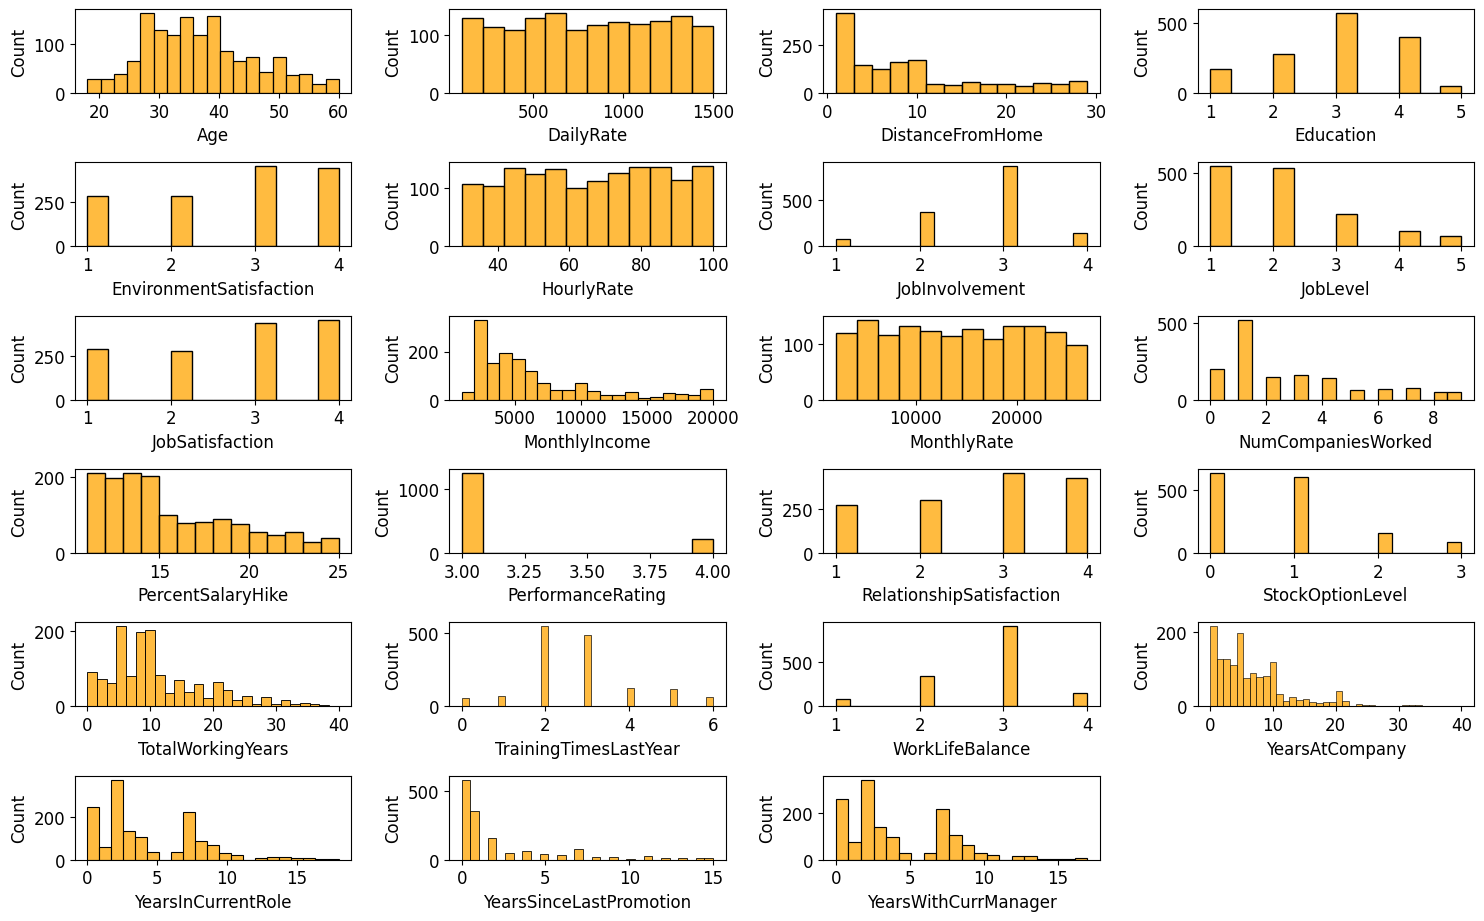

In [ ]:
import matplotlib as mpl
#to show the distribution of all variables with numeriacal values except 'EmployeeNumber'.
mpl.rcParams['font.size'] = 12
num_cols = df.select_dtypes(int, float).columns

plt.figure(figsize=(15,15))
for index, col in enumerate(num_cols):
    plt.subplot(10,4,index+1)
    sns.histplot(data = df,x=col,color='orange')
    
plt.tight_layout()

Overview of Categorical Data

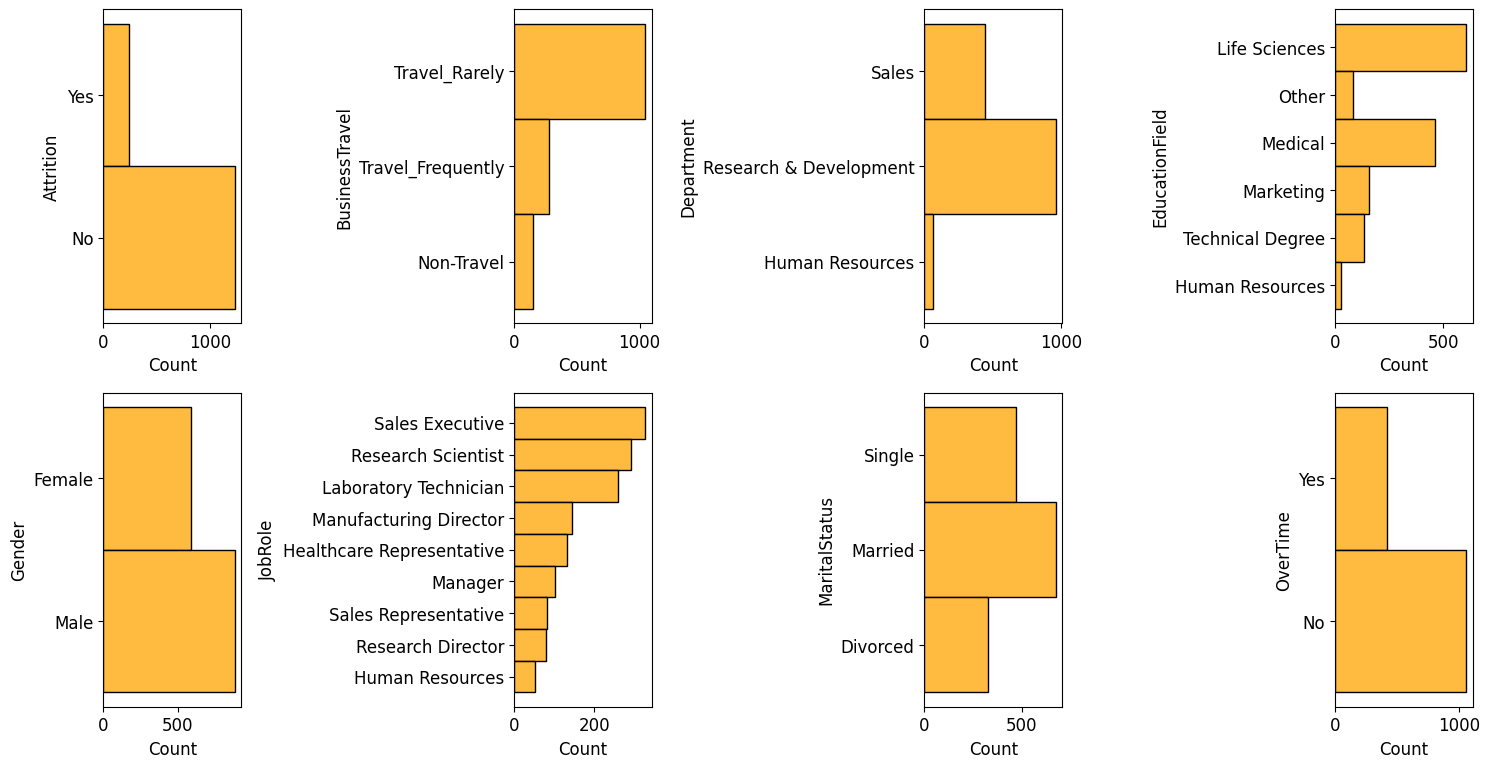

In [ ]:
cat_cols = df.select_dtypes(object).columns

plt.figure(figsize=(15,15))
for index, col in enumerate(cat_cols):
    plt.subplot(4,4,index+1)
    sns.histplot(data = df, y=col,color='orange')
    
plt.tight_layout()

Distribution of the target label "Attrition"

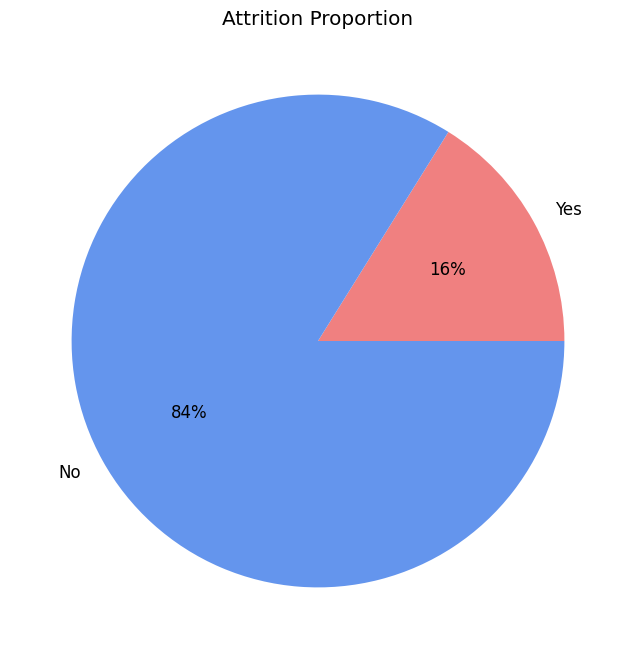

In [ ]:
# Count the number of Attrition values
Y_count = len(df[df['Attrition'] == 'Yes'])
N_count = len(df[df['Attrition'] == 'No'])

# Create data for the pie chart
names = ['Yes', 'No']
size = [Y_count, N_count]

# Create a new plot object
fig, ax = plt.subplots(figsize=(8, 8))

# Create a circle for the center of the plot
my_circle = plt.Circle((0, 0), 0.7, color='white')
ax.add_artist(my_circle)

# Create the pie chart
ax.pie(size, labels=names, colors=['lightcoral', 'cornflowerblue'], autopct='%1.0f%%')

# Set the title
ax.set_title("Attrition Proportion")

# Show the plot
plt.show()

One of the main objectives of the dataset is to predict the likelihood of attrition, so it's important to understand the distribution of the target variable (Attrition) in the dataset. As the histogram shows, the majority of employees in the IBM HR Analytics Employee Attrition & Performance dataset did not leave the company (Attrition = 'No'), with a frequency of around 1,200 which takes up 84% of the total. On the other hand, the number of employees who left the company (Attrition = 'Yes') is significantly lower, with a frequency of around 240 who only takes up 16% of the population. This suggests that employee attrition is a extremely imbalanced label

#### Correlation between "Attrition" and "Age", "YearsAtCompany", and "NumCompaniesWorked"

In [ ]:
Age_YAC_NCW = df[['Age','YearsAtCompany','NumCompaniesWorked','Attrition']]
#Age_YAC_NCW.head()
AYN_melt = Age_YAC_NCW.melt(['Attrition'], var_name='cols',  value_name='vals')
#AYN_melt.head()

/usr/local/lib/python3.9/dist-packages/seaborn/axisgrid.py:848: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  func(*plot_args, **plot_kwargs)
/usr/local/lib/python3.9/dist-packages/seaborn/distributions.py:2511: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  kdeplot(**{axis: a}, ax=ax, color=kde_color, **kde_kws)
/usr/local/lib/python3.9/dist-packages/seaborn/axisgrid.py:848: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level functio

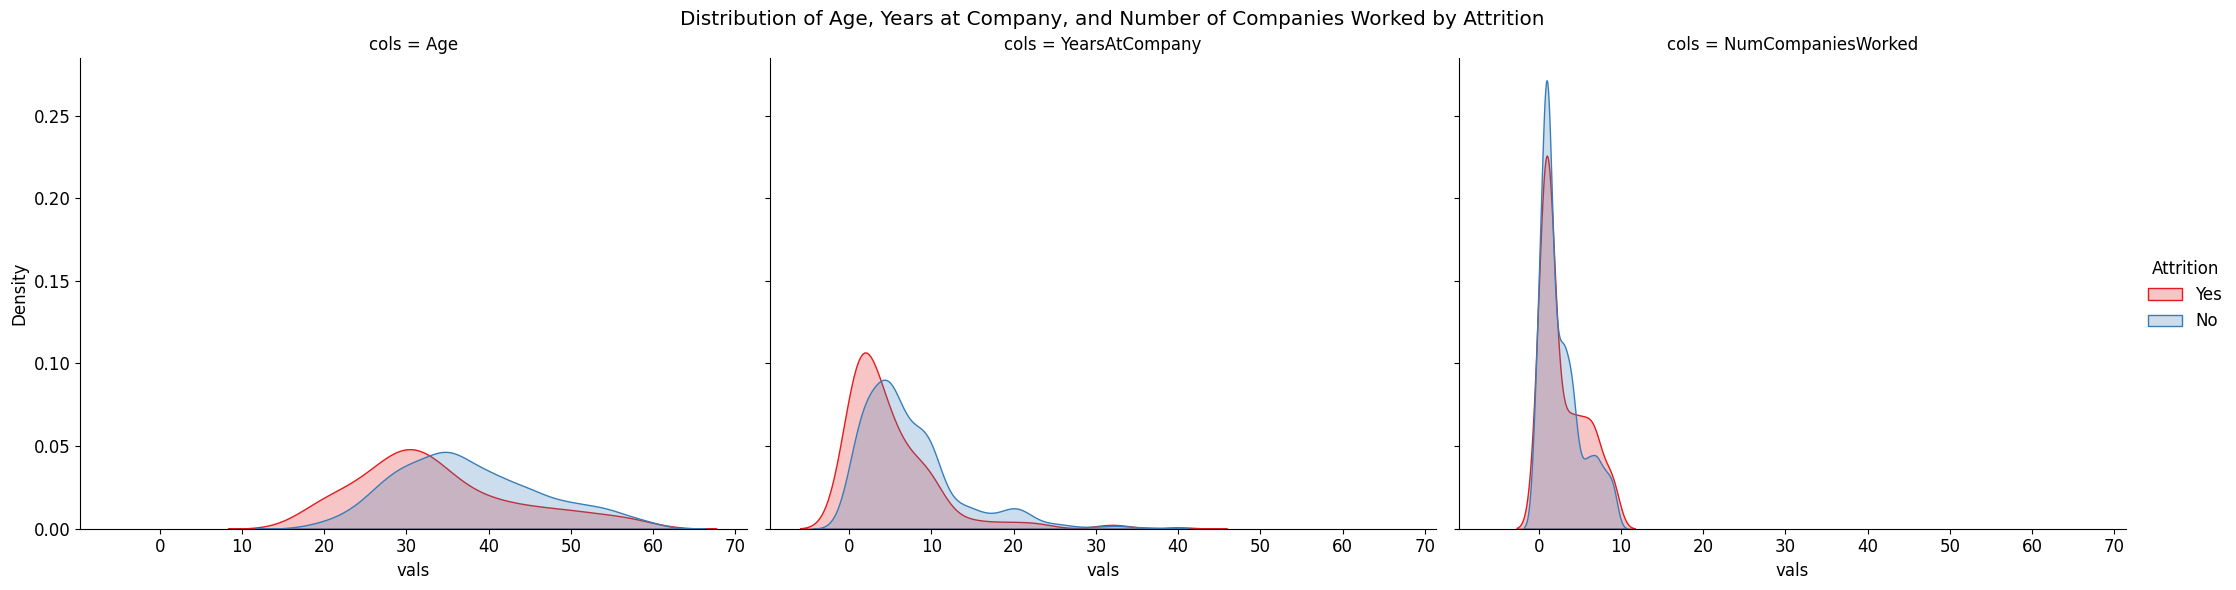

In [ ]:
# Create the FacetGrid with a larger size
g = sns.FacetGrid(AYN_melt, col='cols', hue="Attrition", palette="Set1", height=6, aspect=1.2)

# Map the distribution plot to the FacetGrid
g = (g.map(sns.distplot, "vals", hist=False, rug=False, kde_kws={"shade": True}).add_legend())

# Customize the plot
plt.subplots_adjust(top=0.9)
g.fig.suptitle('Distribution of Age, Years at Company, and Number of Companies Worked by Attrition')

# Show the plot
plt.show()

The density on the y-axis in a kernel density estimate (KDE) plot represents the probability density of the data at each point along the x-axis. In other words, the y-value at a particular point on the x-axis indicates the likelihood that a randomly chosen data point will have that value.

The plotted result reveals that age and years at company have a different correlation with attrition for employees who have left the company compared to those who haven't. The plot suggests that attrited employees tended to be younger and had shorter tenures with the company than non-attrited employees. The plot showed a different story for the number of companies worked. Non-attrited employees had worked in fewer companies compared to attrited employees, who had worked in an average of 8-10 companies.

#### Corraltion between "Attrition" and "Gender"

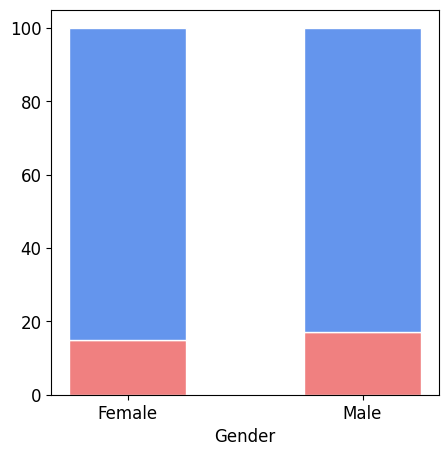

In [ ]:
# Data
r = [0, 1]
Y_F = len(df[(df['Attrition'] == 'Yes') & (df['Gender'] == 'Female')])
N_F = len(df[(df['Attrition'] == 'No') & (df['Gender'] == 'Female')])
Y_M = len(df[(df['Attrition'] == 'Yes') & (df['Gender'] == 'Male')])
N_M = len(df[(df['Attrition'] == 'No') & (df['Gender'] == 'Male')])
raw_data = {'greenBars': [Y_F, Y_M], 'orangeBars': [N_F, N_M]}
plot_df = pd.DataFrame(raw_data)

# From raw value to percentage
totals = [i + j for i, j in zip(plot_df['greenBars'], plot_df['orangeBars'])]
greenBars = [i / j * 100 for i, j in zip(plot_df['greenBars'], totals)]
orangeBars = [i / j * 100 for i, j in zip(plot_df['orangeBars'], totals)]

# plot
plt.figure(figsize=(5, 5))
barWidth = 0.5
names = ('Female', 'Male')
# Create green Bars
plt.bar(r, greenBars, color='lightcoral', edgecolor='white', width=barWidth)
# Create orange Bars
plt.bar(r, orangeBars, bottom=greenBars, color='cornflowerblue', edgecolor='white', width=barWidth)

# Custom x axis
plt.xticks(r, names)
plt.xlabel("Gender")

# Show graphic
plt.show()


Attrition decision seems to have little correlation between the two genders, the slight difference between the two lines is hard to identify.

#### Corraltion between "Attrition" and "MonthlyIncome"

In [ ]:
#Create a new DataFrame called Income by selecting two columns from the original dataset: MonthlyIncome and Attrition.
Income = df[['MonthlyIncome','Attrition']]
Income_melt = Income.melt(['Attrition'], var_name='cols',  value_name='vals')

/usr/local/lib/python3.9/dist-packages/seaborn/axisgrid.py:848: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  func(*plot_args, **plot_kwargs)
/usr/local/lib/python3.9/dist-packages/seaborn/distributions.py:2511: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  kdeplot(**{axis: a}, ax=ax, color=kde_color, **kde_kws)
/usr/local/lib/python3.9/dist-packages/seaborn/axisgrid.py:848: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level functio

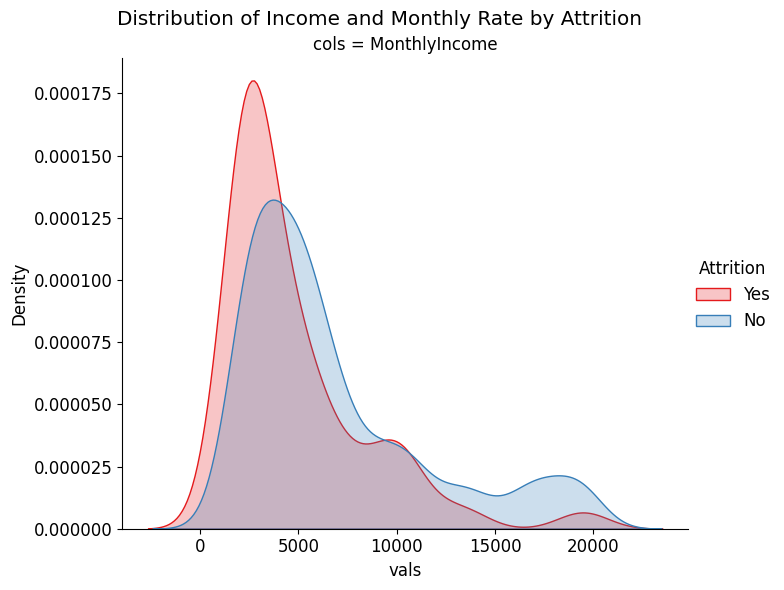

In [ ]:
# Create the FacetGrid with a larger size
g = sns.FacetGrid(Income_melt, col='cols', hue="Attrition", palette="Set1", height=6, aspect=1.2)

# Map the distribution plot to the FacetGrid
g = (g.map(sns.distplot, "vals", hist=False, rug=False, kde_kws={"shade": True}).add_legend())

# Customize the plot
plt.subplots_adjust(top=0.9)
g.fig.suptitle('Distribution of Income and Monthly Rate by Attrition')

# Show the plot
plt.show()

The plot suggests that employees with lower incomes are more likely to attrit, as there is a significant difference in the density peaks of the 'Yes' and 'No' groups. Employees who stayed at the company have a higher median and mean monthly income compared to those who left.

#### "JobInvolcement", "MonthlyIncome" in relation to "Attrition" decision in one plot

<Axes: xlabel='JobInvolvement', ylabel='MonthlyIncome'>

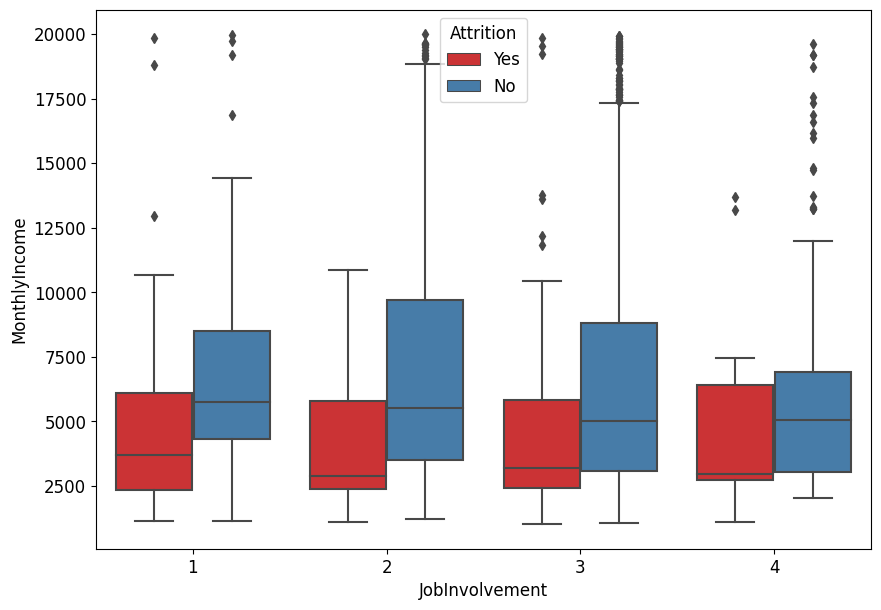

In [ ]:
plt.figure(figsize=(10,7))
sns.boxplot(x="JobInvolvement", y="MonthlyIncome", hue="Attrition",
            data=df, palette="Set1")

Upon further exploration, it was discovered that this relationship was especially strong when combined with a similar level of involvement in the company. This suggests that employees with lower incomes who feel as though their contributions and opportunities for advancement are limited may be more likely to consider leaving the company.

#### "JobSatisfaction" in relation to "Attrition" decision

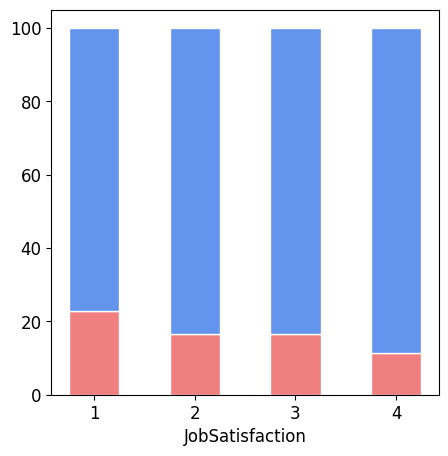

In [ ]:
# Data
r = [0,1,2,3]
Y_J1 = len(df[(df['Attrition'] == 'Yes') & (df['JobSatisfaction'] == 1)])
N_J1 = len(df[(df['Attrition'] == 'No') & (df['JobSatisfaction'] == 1)])
Y_J2 = len(df[(df['Attrition'] == 'Yes') & (df['JobSatisfaction'] == 2)])
N_J2 = len(df[(df['Attrition'] == 'No') & (df['JobSatisfaction'] == 2)])
Y_J3 = len(df[(df['Attrition'] == 'Yes') & (df['JobSatisfaction'] == 3)])
N_J3 = len(df[(df['Attrition'] == 'No') & (df['JobSatisfaction'] == 3)])
Y_J4 = len(df[(df['Attrition'] == 'Yes') & (df['JobSatisfaction'] == 4)])
N_J4 = len(df[(df['Attrition'] == 'No') & (df['JobSatisfaction'] == 4)])
raw_data = {'greenBars': [Y_J1, Y_J2,Y_J3,Y_J4], 'orangeBars': [N_J1,N_J2,N_J3,N_J4]}
 
# From raw value to percentage
totals = [i+j for i,j in zip(raw_data['greenBars'], raw_data['orangeBars'])]
greenBars = [i / j * 100 for i,j in zip(raw_data['greenBars'], totals)]
orangeBars = [i / j * 100 for i,j in zip(raw_data['orangeBars'], totals)]
 
# plot
plt.figure(figsize=(5,5))
barWidth = 0.5
names = ('1','2','3','4')
# Create green Bars
plt.bar(r, greenBars, color='lightcoral', edgecolor='white', width=barWidth)
# Create orange Bars
plt.bar(r, orangeBars, bottom=greenBars, color='cornflowerblue', edgecolor='white', width=barWidth)
# Create blue Bars
#plt.bar(r, blueBars, bottom=[i+j for i,j in zip(greenBars, orangeBars)], color='#a3acff', edgecolor='white', width=barWidth)
 
# Custom x axis
plt.xticks(r, names)
plt.xlabel("JobSatisfaction")
 
# Show graphic
plt.show()

From the resulting plot, it is evident that employees who left the company had significantly lower job satisfaction scores compared who stayed, the value for the attrited employees drop as job satisfaction increases, suggests that job satisfaction is an important factor in employee retention.

#### "EnvironmentSatisfaction" in relation to "Attrition" decision

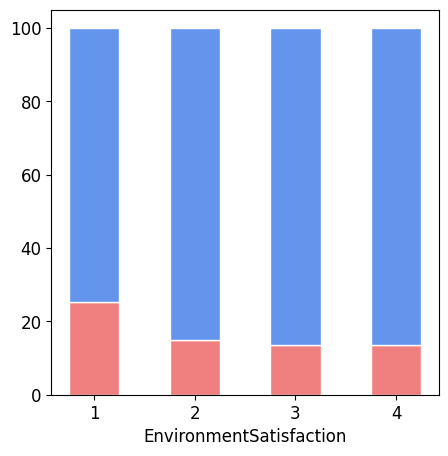

In [ ]:
# Data
r = [0,1,2,3]
Y_J1 = len(df[(df['Attrition'] == 'Yes') & (df['EnvironmentSatisfaction'] == 1)])
N_J1 = len(df[(df['Attrition'] == 'No') & (df['EnvironmentSatisfaction'] == 1)])
Y_J2 = len(df[(df['Attrition'] == 'Yes') & (df['EnvironmentSatisfaction'] == 2)])
N_J2 = len(df[(df['Attrition'] == 'No') & (df['EnvironmentSatisfaction'] == 2)])
Y_J3 = len(df[(df['Attrition'] == 'Yes') & (df['EnvironmentSatisfaction'] == 3)])
N_J3 = len(df[(df['Attrition'] == 'No') & (df['EnvironmentSatisfaction'] == 3)])
Y_J4 = len(df[(df['Attrition'] == 'Yes') & (df['EnvironmentSatisfaction'] == 4)])
N_J4 = len(df[(df['Attrition'] == 'No') & (df['EnvironmentSatisfaction'] == 4)])
raw_data = {'greenBars': [Y_J1, Y_J2,Y_J3,Y_J4], 'orangeBars': [N_J1,N_J2,N_J3,N_J4]}
 
# From raw value to percentage
totals = [i+j for i,j in zip(raw_data['greenBars'], raw_data['orangeBars'])]
greenBars = [i / j * 100 for i,j in zip(raw_data['greenBars'], totals)]
orangeBars = [i / j * 100 for i,j in zip(raw_data['orangeBars'], totals)]
 
# plot
plt.figure(figsize=(5,5))
barWidth = 0.5
names = ('1','2','3','4')
# Create green Bars
plt.bar(r, greenBars, color='lightcoral', edgecolor='white', width=barWidth)
# Create orange Bars
plt.bar(r, orangeBars, bottom=greenBars, color='cornflowerblue', edgecolor='white', width=barWidth)
# Create blue Bars
#plt.bar(r, blueBars, bottom=[i+j for i,j in zip(greenBars, orangeBars)], color='#a3acff', edgecolor='white', width=barWidth)
 
# Custom x axis
plt.xticks(r, names)
plt.xlabel("EnvironmentSatisfaction")
 
# Show graphic
plt.show()

Employees with lower levels of environment satisfaction have a higher tendency of leaving the company. As the satisfaction score increases, the less percentage of employee leaves the company, suggesting a possible correlation between envrionment satisfaction and attrition decision.

#### "Attrition" compared across "Department" in associate with its "PerformanceRating"

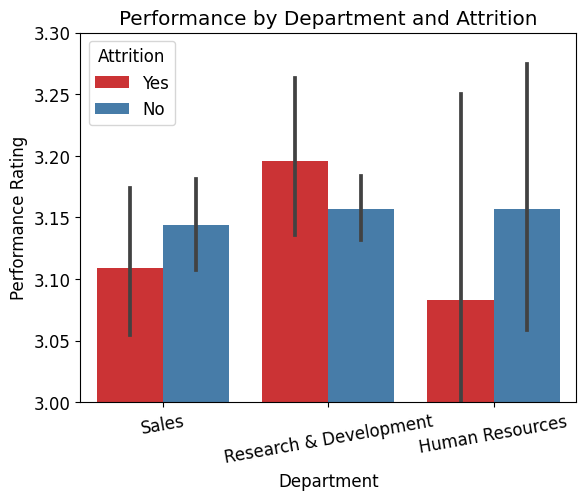

In [ ]:
# select data
perf_dept = df[['Department', 'PerformanceRating', 'Attrition']]

# create bar plot
sns.barplot(x='Department', y='PerformanceRating', hue='Attrition', data=perf_dept, palette='Set1')

# set plot title and labels
plt.title('Performance by Department and Attrition')
plt.xlabel('Department')
plt.ylabel('Performance Rating')
plt.xticks(rotation=10)

# show plot
plt.ylim(3, 3.3)
plt.show()

When analyzing the relationship between departmental performance and the decision to leave, it was found that the Sales and Human Resources departments had similar levels of performance score. However, those who left these two departments tended to have slightly worse performance scores than those who stayed. In contrast, the Research & Development department showed a different pattern, with those who stayed having similar performance scores compared to other departments, while those who left had significantly higher performance ratings. This suggests that the department may be particularly vulnerable to poaching by other companies.

## 4. Pre-processing

#### Check Multicolinearity

In [ ]:
# Correlation matrix
def plotCorrelationMatrix(df, graphWidth):
    df = df[[col for col in df if df[col].nunique() > 1]] # keep columns where there are more than 1 unique values
    if df.shape[1] < 2:
        print(f'No correlation plots shown: The number of non-NaN or constant columns ({df.shape[1]}) is less than 2')
        return
    corr = df.corr()
    plt.figure(num=None, figsize=(graphWidth, graphWidth), dpi=80, facecolor='w', edgecolor='w')
    corrMat = sns.heatmap(corr, vmin = -1, vmax = 1, cmap = "Spectral", annot = True)
    plt.xticks(range(len(corr.columns)), corr.columns, rotation=90)
    plt.yticks(range(len(corr.columns)), corr.columns)
    plt.gca().xaxis.tick_bottom()
    plt.title(f'Correlation Matrix for', fontsize=20)
    plt.show()


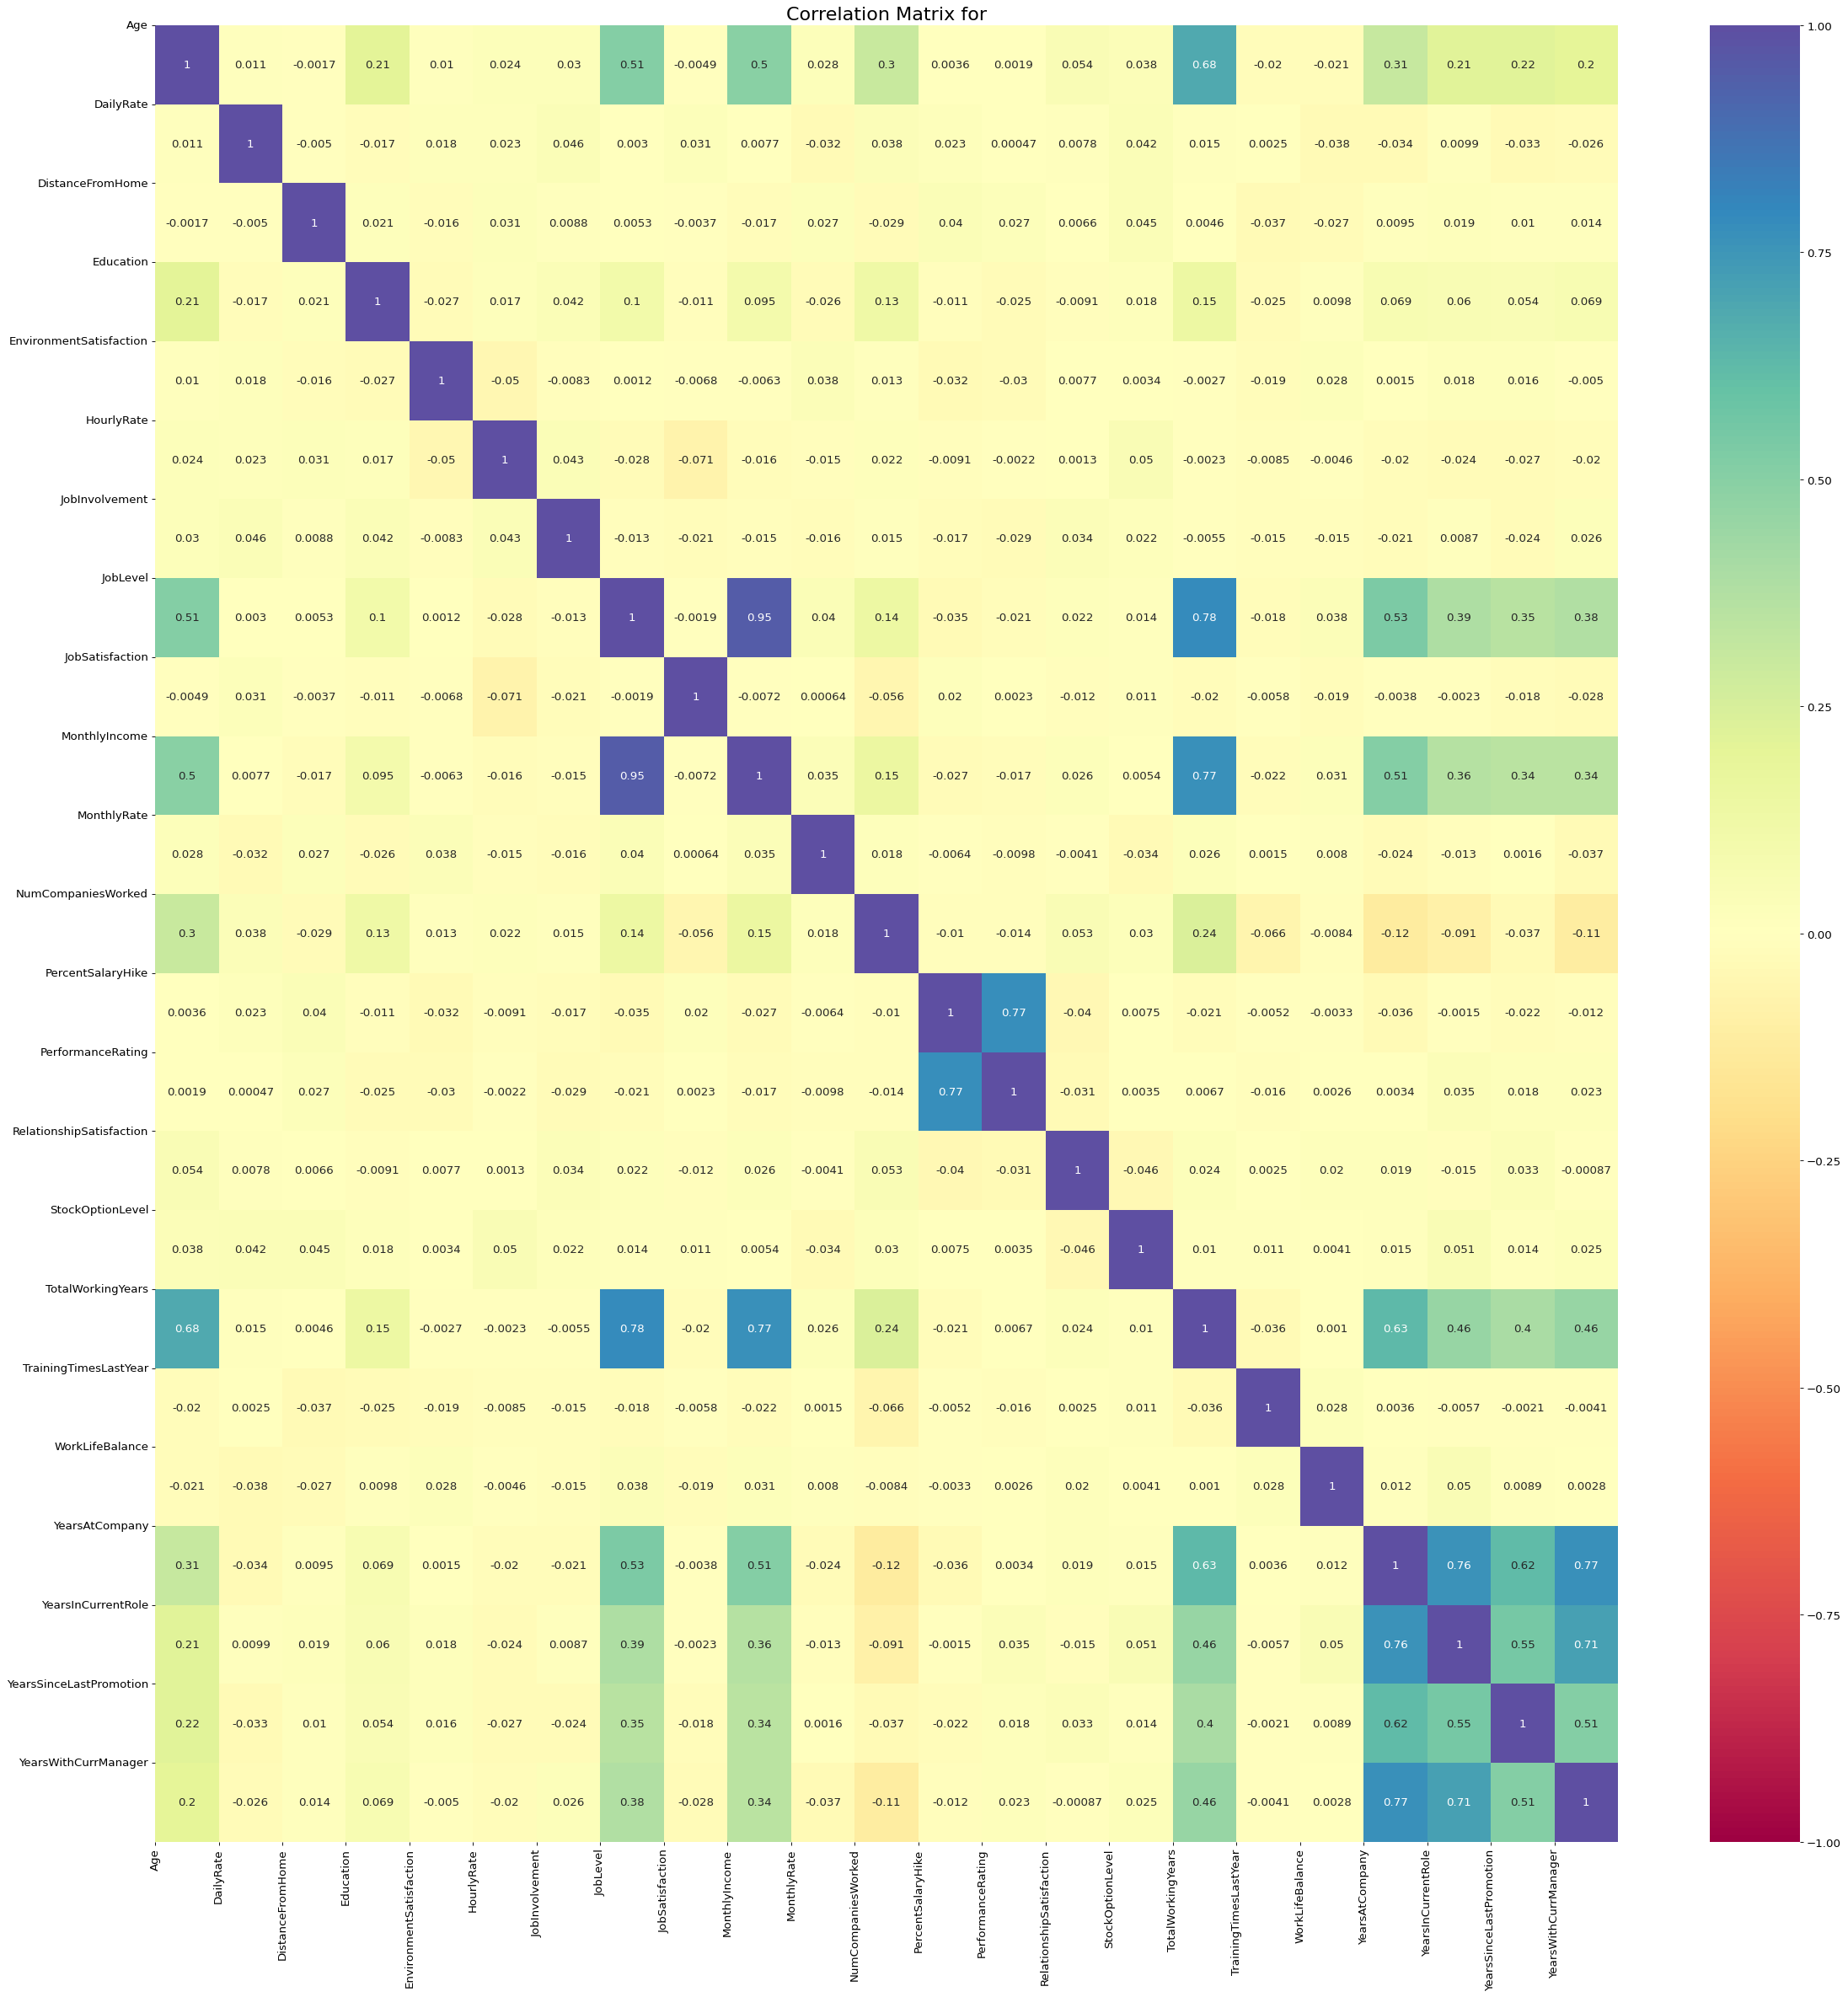

In [ ]:
plotCorrelationMatrix(df, 35)

#### Conclusion from Confusion Matrix: (choose several variables to drop)
'Monthly Income' is highly correlated with 'Job level'. So we are going to drop column 'MonthlyIncome'.

In [ ]:
df = df.drop(['MonthlyIncome'],axis=1)

In [ ]:
df['Attrition'] = df['Attrition'].factorize(['No','Yes'])[0] #No for 0 and Yes for 1
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,1,Travel_Rarely,1102,Sales,1,2,Life Sciences,2,Female,...,3,1,0,8,0,1,6,4,0,5
1,49,0,Travel_Frequently,279,Research & Development,8,1,Life Sciences,3,Male,...,4,4,1,10,3,3,10,7,1,7
2,37,1,Travel_Rarely,1373,Research & Development,2,2,Other,4,Male,...,3,2,0,7,3,3,0,0,0,0
3,33,0,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,4,Female,...,3,3,0,8,3,3,8,7,3,0
4,27,0,Travel_Rarely,591,Research & Development,2,1,Medical,1,Male,...,3,4,1,6,3,3,2,2,2,2


Categorical variables represent qualitative data that cannot be directly used in models, as the algorithms usually require numerical input. Therefore, we need to transform them into a numerical format that can be used in the model. Dummy variables are created by assigning a binary value (0 or 1) to each category of the categorical variable. This way, we can represent the categorical variable as a set of binary variables, where each variable indicates the presence or absence of a particular category.

Dummy variables allow the model to capture the effect of each category on the outcome variable independently, while also accounting for the correlation between categories. This can lead to better model performance and more accurate predictions. Additionally, using dummy variables can help avoid the issue of ordinality, which can arise when using numerical codes for categorical variables.

In [ ]:
#  Transform categorical data into dummies
col_2_dummy = ["BusinessTravel","Department","Education","EducationField","EnvironmentSatisfaction","Gender","JobInvolvement","JobLevel","JobRole",
               "JobSatisfaction","MaritalStatus","NumCompaniesWorked","OverTime","PerformanceRating","RelationshipSatisfaction","StockOptionLevel","WorkLifeBalance"]

df2 = pd.get_dummies(df, columns = col_2_dummy, drop_first=False, dtype='uint8')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 30 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   int64 
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EnvironmentSatisfaction   1470 non-null   int64 
 9   Gender                    1470 non-null   object
 10  HourlyRate                1470 non-null   int64 
 11  JobInvolvement            1470 non-null   int64 
 12  JobLevel                  1470 non-null   int64 
 13  JobRole                   1470 non-null   object
 14  JobSatisfaction         

Implementing Smote technique to balance the attrition classes and to augement data

In [ ]:
import pandas as pd
from imblearn.over_sampling import SMOTE
# Separate features and target variable
X = df2.drop('Attrition', axis=1)
y = df2['Attrition']

# Use SMOTE to oversample the minority class
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)
df2 = pd.concat([X_resampled, y_resampled], axis=1)

df2.head()

,Age,DailyRate,DistanceFromHome,HourlyRate,MonthlyRate,PercentSalaryHike,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsInCurrentRole,...,RelationshipSatisfaction_4,StockOptionLevel_0,StockOptionLevel_1,StockOptionLevel_2,StockOptionLevel_3,WorkLifeBalance_1,WorkLifeBalance_2,WorkLifeBalance_3,WorkLifeBalance_4,Attrition
0,41,1102,1,94,19479,11,8,0,6,4,...,0,1,0,0,0,1,0,0,0,1
1,49,279,8,61,24907,23,10,3,10,7,...,1,0,1,0,0,0,0,1,0,0
2,37,1373,2,92,2396,15,7,3,0,0,...,0,1,0,0,0,0,0,1,0,1
3,33,1392,3,56,23159,11,8,3,8,7,...,0,1,0,0,0,0,0,1,0,0
4,27,591,2,40,16632,12,6,3,2,2,...,1,0,1,0,0,0,0,1,0,0


In [ ]:
print("The new dimension of the dataframe is ", df2.shape)


The new dimension of the dataframe is  (2466, 87)


In [ ]:
X = df2.drop('Attrition', axis=1)
y = df2['Attrition']

### Dataset without validation

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

### Dataset with validation

In [ ]:
# 5:2:3 train:validation:test

X_train_v, X_test_v, y_train_v, y_test_v = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)
X_train_v, X_val, y_train_v, y_val = train_test_split(X_train_v, y_train_v, test_size=0.2, random_state=42, stratify=y_train_v)


## 5. Implement of ML algorithms

### *Naive Bayes*

In [ ]:
from sklearn.naive_bayes import GaussianNB

nb_clf = GaussianNB()
nb_clf.fit(X_train, y_train)


GaussianNB()

In [ ]:
# Evaluate model on testing dataset
y_test_nb = nb_clf.predict(X_test)
print('TESTING RESULTS')
print('=======================')
print('Classification report for Naive Bayes')
print(classification_report(y_test_v, y_test_nb))
print('Accuracy score:', accuracy_score(y_test_v, y_test_nb))
print('ROC AUC:', roc_auc_score(y_test_v, nb_clf.predict_proba(X_test)[:,1]))

TESTING RESULTS
Classification report for Naive Bayes
              precision    recall  f1-score   support

           0       0.90      0.76      0.82       370
           1       0.79      0.91      0.85       370

    accuracy                           0.84       740
   macro avg       0.85      0.84      0.84       740
weighted avg       0.85      0.84      0.84       740

Accuracy score: 0.8378378378378378
ROC AUC: 0.9470562454346237


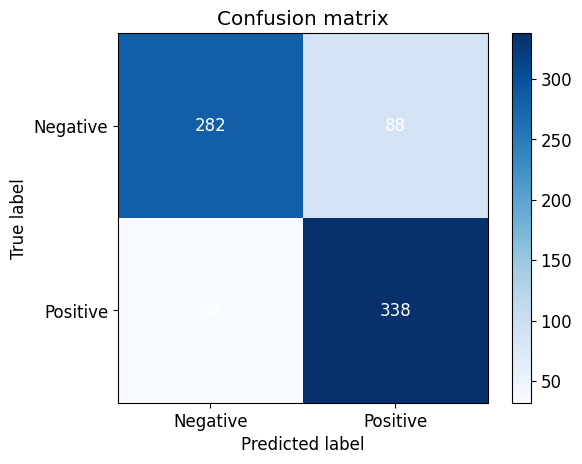

In [ ]:
# Calculate confusion matrix
nb_cm = confusion_matrix(y_test, y_test_nb)

# Plot confusion matrix
plt.imshow(nb_cm, cmap=plt.cm.Blues)
plt.colorbar()
plt.xticks([0, 1], ['Negative', 'Positive'])
plt.yticks([0, 1], ['Negative', 'Positive'])
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.title('Confusion matrix')

# Add values to confusion matrix
for i in range(2):
    for j in range(2):
        plt.text(j, i, str(nb_cm[i][j]), color='w', horizontalalignment='center', verticalalignment='center')

# Show plot
plt.show()

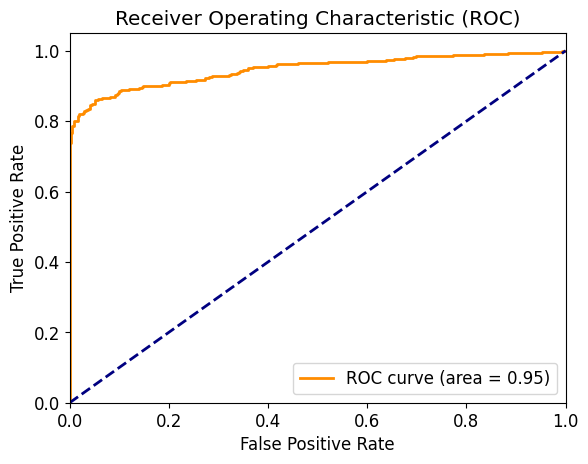

In [ ]:
# Calculate false positive rate, true positive rate, and AUC for ROC curve
nb_fpr, nb_tpr, thresholds = roc_curve(y_test, nb_clf.predict_proba(X_test)[:,1])
nb_roc_auc = auc(nb_fpr, nb_tpr)

# Plot ROC curve
plt.figure()
lw = 2
plt.plot(nb_fpr, nb_tpr, color='darkorange',
         lw=lw, label='ROC curve (area = %0.2f)' % nb_roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc="lower right")
plt.show()

In [ ]:
from sklearn.metrics import recall_score, f1_score, accuracy_score, mean_squared_error, precision_score

# Calculate the metrics for the model
recall = recall_score(y_test, y_test_nb)
f1 = f1_score(y_test, y_test_nb)
accuracy = accuracy_score(y_test, y_test_nb)
mse = mean_squared_error(y_test, y_test_nb)
precision = precision_score(y_test, y_test_nb)

print("Recall score:", recall)
print("F1 score:", f1)
print("Accuracy score:", accuracy)
print("Mean squared error:", mse)
print("Precision:", precision)

Recall score: 0.9135135135135135
F1 score: 0.8492462311557788
Accuracy score: 0.8378378378378378
Mean squared error: 0.16216216216216217
Precision: 0.7934272300469484


### *Logistic Regression*

In [ ]:
lr_clf = LogisticRegression(solver='liblinear', penalty='l1')
lr_clf.fit(X_train, y_train)

y_test_lr = lr_clf.predict(X_test)
print('TRAINING RESULTS')
print('=======================')
print('Classification report for Logistic Regression')
print(classification_report(y_train,lr_clf.predict(X_train)))
print('Accuracy score:',accuracy_score(y_train, lr_clf.predict(X_train)))
print('ROC AUC:', roc_auc_score(y_train, lr_clf.predict_proba(X_train)[:,1]))
print('\nTESTING RESULTS')
print('=======================')
print('Classification report')
print(classification_report(y_test,y_test_lr))
print('Accuracy score:',accuracy_score(y_test, y_test_lr))
print('ROC AUC:', roc_auc_score(y_test, lr_clf.predict_proba(X_test)[:,1]))

TRAINING RESULTS
Classification report for Logistic Regression
              precision    recall  f1-score   support

           0       0.91      0.97      0.94       863
           1       0.97      0.90      0.94       863

    accuracy                           0.94      1726
   macro avg       0.94      0.94      0.94      1726
weighted avg       0.94      0.94      0.94      1726

Accuracy score: 0.9391657010428737
ROC AUC: 0.9808114999415927

TESTING RESULTS
Classification report
              precision    recall  f1-score   support

           0       0.92      0.97      0.94       370
           1       0.97      0.92      0.94       370

    accuracy                           0.94       740
   macro avg       0.94      0.94      0.94       740
weighted avg       0.94      0.94      0.94       740

Accuracy score: 0.9418918918918919
ROC AUC: 0.9752227903579254


In [ ]:
from sklearn.metrics import recall_score, f1_score, accuracy_score, mean_squared_error, precision_score

# Calculate the metrics for the model
recall = recall_score(y_test, y_test_lr)
f1 = f1_score(y_test, y_test_lr)
accuracy = accuracy_score(y_test, y_test_lr)
mse = mean_squared_error(y_test, y_test_lr)
precision = precision_score(y_test, y_test_lr)


print("Recall score:", recall)
print("F1 score:", f1)
print("Accuracy score:", accuracy)
print("Mean squared error:", mse)
print("Precision:", precision)

Recall score: 0.9162162162162162
F1 score: 0.9403606102635229
Accuracy score: 0.9418918918918919
Mean squared error: 0.05810810810810811
Precision: 0.9658119658119658


The accuracy score represents the proportion of correct predictions made by the model, which is around 94% for both the training and testing sets. The ROC AUC score (receiver operating characteristic area under the curve) is a metric that assesses the overall performance of the model across all possible thresholds and is also high, around 0.98 for the training set and 0.97 for the testing set.

In summary, this model seems to perform well, with high accuracy and ROC AUC scores. Both precision and recall values are high for both classes, indicating that the model is able to predict both classes accurately.

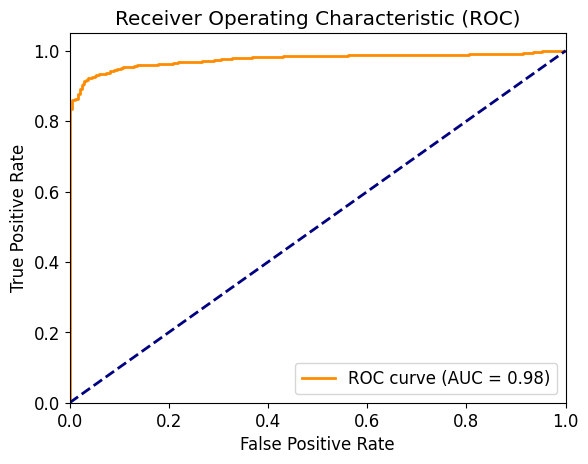

In [ ]:
# Calculate false positive rate, true positive rate, and AUC for ROC curve
fpr, tpr, thresholds = roc_curve(y_test, lr_clf.predict_proba(X_test)[:,1])
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (AUC = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc="lower right")

# Show plot
plt.show()

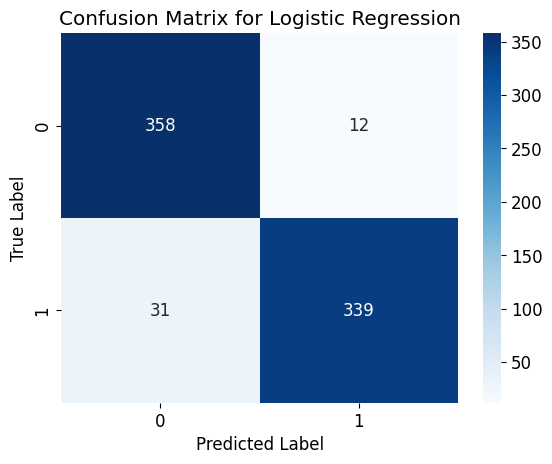

In [ ]:
# Plot the confusion matrix
cm = confusion_matrix(y_test, y_test_lr)
sns.heatmap(cm, annot=True, cmap='Blues', fmt='d')
plt.title('Confusion Matrix for Logistic Regression')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

To explain the result of confusion matrix for Logistic Regression

An ROC AUC (Area Under the Receiver Operating Characteristic Curve) score of 0.98 indicates that the model has very good discriminative power. This means that the model is able to effectively distinguish between positive and negative classes, with a high degree of accuracy. The closer the ROC AUC score is to 1, the better the model is at correctly identifying positive and negative cases. 

Logistic regression model have high accuracy score on training dataset and also high accuracy score on test dataset. Tested results with both small and large train dataset.

We want to improve the logistic regression model by tuning its hyperparameters. One common approach is to perform a grid search over a range of hyperparameters and select the combination that gives the best performance on a validation set. This can be done using GridSearchCV from the sklearn.model_selection module.

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, accuracy_score, roc_auc_score

# Define pipeline
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('classifier', LogisticRegression(solver='liblinear'))
])

# Define hyperparameters for tuning
hyperparameters = {
    'classifier__penalty': ['l1', 'l2'],
    'classifier__C': [0.1, 1, 10, 100]
}

# Perform grid search cross-validation
grid_search = GridSearchCV(pipeline, hyperparameters, cv=5, scoring='roc_auc')
grid_search.fit(X_train_v, y_train_v)

# Print best hyperparameters
print('Best hyperparameters:', grid_search.best_params_)

Best hyperparameters: {'classifier__C': 0.1, 'classifier__penalty': 'l2'}


In [ ]:
# Evaluate model on training dataset
y_train_pred = grid_search.predict(X_train_v)
print('TRAINING RESULTS')
print('=======================')
print('Classification report for Logistic Regression')
print(classification_report(y_train_v, y_train_pred))
print('Accuracy score:', accuracy_score(y_train_v, y_train_pred))
print('ROC AUC:', roc_auc_score(y_train, lr_clf.predict_proba(X_train)[:,1]))

print()

# Evaluate model on testing dataset
y_test_lr = grid_search.predict(X_test_v)
print('TESTING RESULTS')
print('=======================')
print('Classification report')
print(classification_report(y_test_v, y_test_lr))
print('Accuracy score:', accuracy_score(y_test_v, y_test_lr))
print('ROC AUC:', roc_auc_score(y_test, lr_clf.predict_proba(X_test)[:,1]))

TRAINING RESULTS
Classification report for Logistic Regression
              precision    recall  f1-score   support

           0       0.91      0.98      0.94       690
           1       0.98      0.90      0.94       690

    accuracy                           0.94      1380
   macro avg       0.94      0.94      0.94      1380
weighted avg       0.94      0.94      0.94      1380

Accuracy score: 0.9405797101449276
ROC AUC: 0.9808114999415927

TESTING RESULTS
Classification report
              precision    recall  f1-score   support

           0       0.92      0.95      0.94       370
           1       0.95      0.92      0.94       370

    accuracy                           0.94       740
   macro avg       0.94      0.94      0.94       740
weighted avg       0.94      0.94      0.94       740

Accuracy score: 0.9378378378378378
ROC AUC: 0.9752227903579254


In [ ]:
from sklearn.metrics import recall_score, f1_score, accuracy_score, mean_squared_error

# Calculate the metrics for the model
recall = recall_score(y_test_v, y_test_lr)
f1 = f1_score(y_test_v, y_test_lr)
accuracy = accuracy_score(y_test_v, y_test_lr)
mse = mean_squared_error(y_test_v, y_test_lr)

print("Recall score:", recall)
print("F1 score:", f1)
print("Accuracy score:", accuracy)
print("Mean squared error:", mse)

Recall score: 0.9216216216216216
F1 score: 0.9368131868131867
Accuracy score: 0.9378378378378378
Mean squared error: 0.062162162162162166


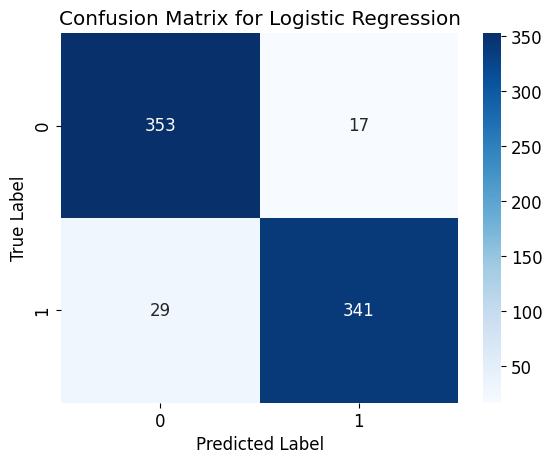

In [ ]:
# Plot the confusion matrix
cm = confusion_matrix(y_test, y_test_lr)
sns.heatmap(cm, annot=True, cmap='Blues', fmt='d')
plt.title('Confusion Matrix for Logistic Regression')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

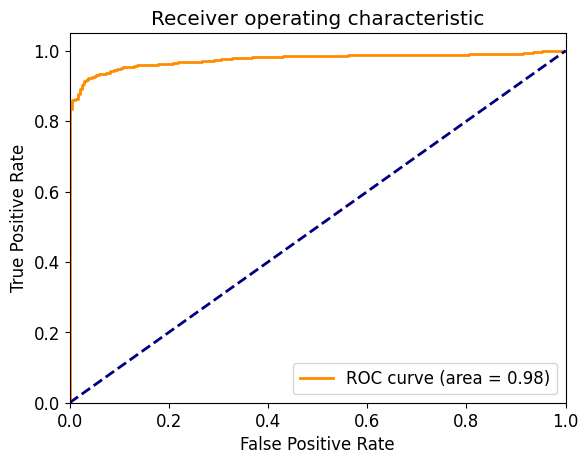

In [ ]:
# Plot ROC curve
plt.figure()
lw = 2
plt.plot(fpr, tpr, color='darkorange',
         lw=lw, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()

Since the best model was found to be Logistic Regression, here is the variables analysis part. Putting it behind model comparison would cause unnecesarry checking time for the variable names, so here it is.

In [ ]:
import pandas as pd
import numpy as np

# Get the coefficients and feature names
coef = lr_clf.coef_[0]
features = np.array(X_train.columns)

# Create a dataframe with the coefficients and feature names
coef_df = pd.DataFrame({'feature': features, 'coef': coef})

# Sort the dataframe by absolute value of coefficients
coef_df['abs_coef'] = np.abs(coef_df['coef'])
coef_df = coef_df.sort_values('abs_coef', ascending=False)

# Print the top 10 features
print('Top 10 features:')
print(coef_df.head(10))


Top 10 features:
                      feature      coef  abs_coef
49  JobRole_Research Director -1.943007  1.943007
70                OverTime_No -1.926591  1.926591
40                 JobLevel_2 -1.749417  1.749417
42                 JobLevel_4 -1.714668  1.714668
38           JobInvolvement_4 -1.622573  1.622573
12  BusinessTravel_Non-Travel -1.612996  1.612996
60       NumCompaniesWorked_0 -1.551639  1.551639
84          WorkLifeBalance_3 -1.447404  1.447404
79         StockOptionLevel_1 -1.305123  1.305123
37           JobInvolvement_3 -1.276088  1.276088


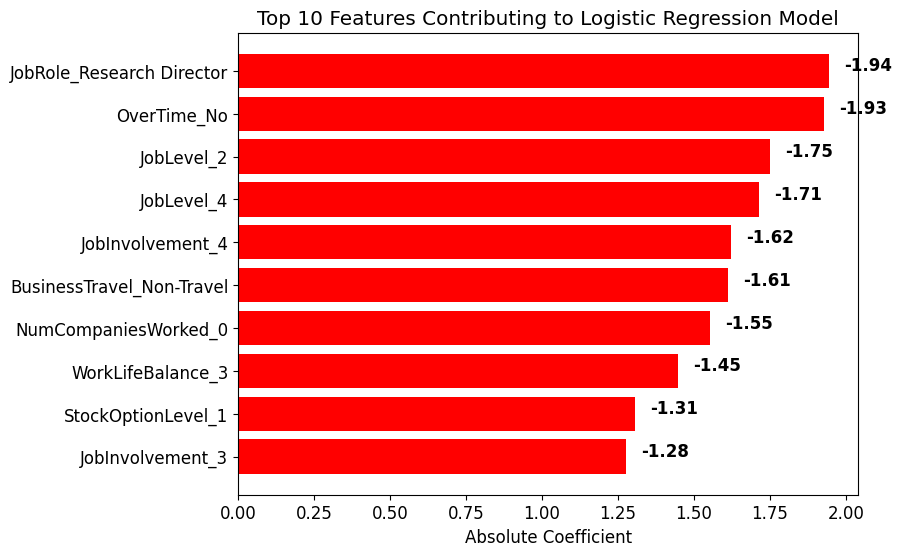

In [ ]:
# Create a bar chart of the top 10 features
top_coef = coef_df.head(10)
fig, ax = plt.subplots(figsize=(8, 6))
ax.barh(top_coef['feature'], top_coef['abs_coef'], height=0.8, color='red')
ax.invert_yaxis()  # Invert y-axis to show most important features at the top
ax.set_xlabel('Absolute Coefficient')
ax.set_title('Top 10 Features Contributing to Logistic Regression Model')

# Add the coefficient values next to each bar
for i, v in enumerate(top_coef['coef']):
    ax.text(abs(v) + 0.05, i, '{:.2f}'.format(v), color='black', fontweight='bold')

plt.show()


In [ ]:
# Get the coefficients and feature names
coef = lr_clf.coef_[0]
features = np.array(X_train.columns)

# Create a dataframe with the coefficients and feature names
coef_df = pd.DataFrame({'feature': features, 'coef': coef})

# Sort the dataframe by coefficient value
coef_df = coef_df.sort_values('coef', ascending=False)

# Print the top 10 features
print('Top 10 features:')
print(coef_df.head(10))


Top 10 features:
                             feature      coef
13  BusinessTravel_Travel_Frequently  0.195082
10           YearsSinceLastPromotion  0.175396
51           JobRole_Sales Executive  0.066731
8                     YearsAtCompany  0.062393
2                   DistanceFromHome  0.047456
3                         HourlyRate  0.004479
4                        MonthlyRate  0.000024
43                        JobLevel_5  0.000000
22                       Education_5  0.000000
23    EducationField_Human Resources  0.000000


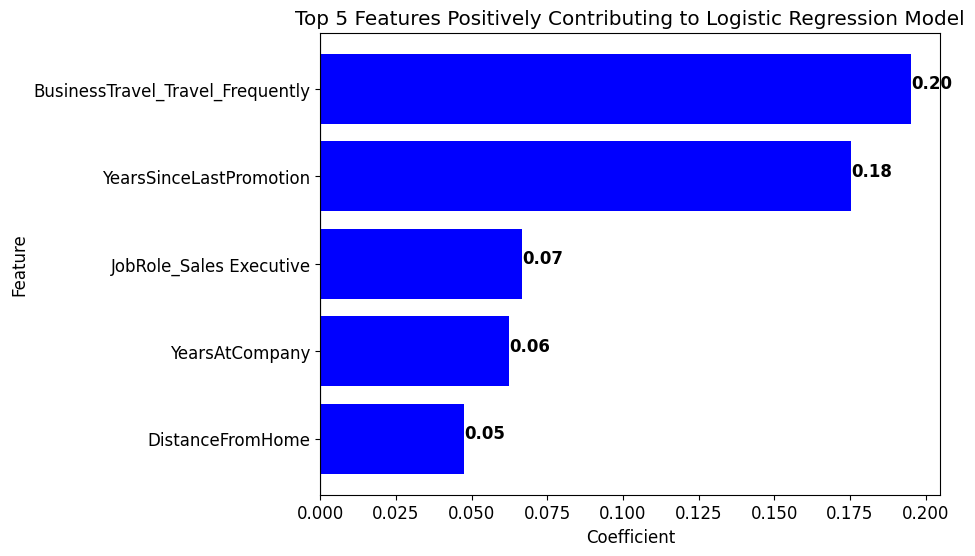

In [ ]:
# Filter out the coefficients that are equal to 0
non_zero_coef_df = coef_df[coef_df['coef'] > 0.01]

# Create a bar chart of the non-zero features
top_coef = non_zero_coef_df.head(10)
fig, ax = plt.subplots(figsize=(8, 6))
ax.barh(top_coef['feature'], top_coef['coef'], height=0.8, color='blue')
ax.invert_yaxis()  # Invert y-axis to show most important features at the top
ax.set_ylabel('Feature')
ax.set_xlabel('Coefficient')
ax.set_title('Top 5 Features Positively Contributing to Logistic Regression Model')

# Add the coefficient values next to each bar
for i, v in enumerate(top_coef['coef']):
    ax.text(v, i, '{:.2f}'.format(v), color='black', fontweight='bold')

# Add a vertical line at x=0 to show the boundary between positive and negative coefficients
ax.axvline(x=0, color='black')

plt.show()


### *Random Forest*

In [ ]:
from sklearn.ensemble import RandomForestClassifier

#Build Random Forest Model
rf_clf = RandomForestClassifier(n_estimators=100, bootstrap=False)
rf_clf.fit(X_train, y_train)

#Evaluate the model with training set and testing set
print('TRAINING RESULTS')
print('=======================')
print('Classification report')
print(classification_report(y_train,rf_clf.predict(X_train)))
print('Accuracy score:',accuracy_score(y_train, rf_clf.predict(X_train)))
print('ROC AUC: ', roc_auc_score(y_train,rf_clf.predict_proba(X_train)[:,1]))
print('\nTESTING RESULTS')
print('=======================')
print('Classification report')
print(classification_report(y_test,rf_clf.predict(X_test)))
print('Accuracy score:',accuracy_score(y_test, rf_clf.predict(X_test)))
print('ROC AUC: ', roc_auc_score(y_test,rf_clf.predict_proba(X_test)[:,1]))

TRAINING RESULTS
Classification report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       863
           1       1.00      1.00      1.00       863

    accuracy                           1.00      1726
   macro avg       1.00      1.00      1.00      1726
weighted avg       1.00      1.00      1.00      1726

Accuracy score: 1.0
ROC AUC:  1.0

TESTING RESULTS
Classification report
              precision    recall  f1-score   support

           0       0.89      0.98      0.93       370
           1       0.98      0.88      0.92       370

    accuracy                           0.93       740
   macro avg       0.93      0.93      0.93       740
weighted avg       0.93      0.93      0.93       740

Accuracy score: 0.9283783783783783
ROC AUC:  0.9745252008765521


The accuracy score and ROC AUC are both 1 for the training set, it indicates that the model has learned the training data well, but it may not necessarily mean that it can generalize well to new data. While the score for testing set is not bad, we need fine-tune the model's hyperparameters to improve its performance on new, unseen data, which can help reduce overfitting and improve model generalization performance.

In [ ]:
# Look at parameters used by our current forest
from pprint import pprint

print('Parameters currently in use:\n')
pprint(rf_clf.get_params())

Parameters currently in use:

{'bootstrap': False,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'sqrt',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}


We are going to looking at following hyperparameters:
- n_estimators
- max_depth
- max_features
- min_samples_split
- min_samples_leaf

In [ ]:
from sklearn.model_selection import GridSearchCV

# Define Hyperparameter Grid
rf_param_grid = {
    'n_estimators': [10, 50, 100, 200, 500],
    'max_depth': [2, 5, 10, 20, None],
    'max_features': ['auto', 'sqrt', 'log2'],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Perform Grid Search with 5-fold cross-validation
rf_grid_search = GridSearchCV(estimator=rf_clf, param_grid=rf_param_grid, cv=5, n_jobs=-1, verbose=1)
rf_grid_search.fit(X_train_v, y_train_v)

# Print best hyperparameters
print("Best parameters: ", rf_grid_search.best_params_)

Fitting 5 folds for each of 675 candidates, totalling 3375 fits
Best parameters:  {'max_depth': 10, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 500}


In [ ]:
rf_max_depth = rf_grid_search.best_params_['max_depth']
rf_max_features = rf_grid_search.best_params_['max_features']
rf_msl = rf_grid_search.best_params_['min_samples_leaf']
rf_mss = rf_grid_search.best_params_['min_samples_split']
rf_n_estimators = rf_grid_search.best_params_['n_estimators']

In [ ]:
#Redo the random forest model with the updated best parameters
rf_best_model = RandomForestClassifier(n_estimators = rf_n_estimators,
                                       max_depth = rf_max_depth,
                                       max_features = rf_max_features,
                                       min_samples_split = rf_mss,
                                       min_samples_leaf = rf_msl)

rf_best_model.fit(X_train_v, y_train_v)

RandomForestClassifier(max_depth=10, n_estimators=500)

In [ ]:
# Evaluate the best model on the training set and test set
print('TRAINING RESULTS')
print('=======================')
print('Classification report')
print(classification_report(y_train_v, rf_best_model.predict(X_train_v)))
print('Accuracy score:',accuracy_score(y_train_v, rf_best_model.predict(X_train_v)))
print('ROC AUC: ', roc_auc_score(y_train_v, rf_best_model.predict_proba(X_train_v)[:,1]))

y_test_rf = rf_best_model.predict(X_test_v)
print('\nTESTING RESULTS')
print('=======================')
print('Classification report')
print(classification_report(y_test_v, y_test_rf))
print('Accuracy score:',accuracy_score(y_test_v, y_test_rf))
print('ROC AUC: ', roc_auc_score(y_test_v, rf_best_model.predict_proba(X_test_v)[:,1]))

TRAINING RESULTS
Classification report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       690
           1       1.00      1.00      1.00       690

    accuracy                           1.00      1380
   macro avg       1.00      1.00      1.00      1380
weighted avg       1.00      1.00      1.00      1380

Accuracy score: 1.0
ROC AUC:  1.0

TESTING RESULTS
Classification report
              precision    recall  f1-score   support

           0       0.90      0.96      0.93       370
           1       0.95      0.89      0.92       370

    accuracy                           0.92       740
   macro avg       0.93      0.92      0.92       740
weighted avg       0.93      0.92      0.92       740

Accuracy score: 0.9243243243243243
ROC AUC:  0.972826880934989


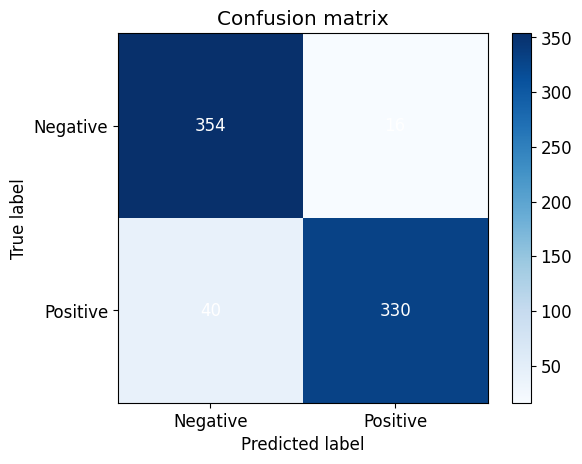

In [ ]:
# Calculate confusion matrix
rf_best_model_cm = confusion_matrix(y_test, y_test_rf)

# Plot confusion matrix
plt.imshow(rf_best_model_cm, cmap=plt.cm.Blues)
plt.colorbar()
plt.xticks([0, 1], ['Negative', 'Positive'])
plt.yticks([0, 1], ['Negative', 'Positive'])
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.title('Confusion matrix')

# Add values to confusion matrix
for i in range(2):
    for j in range(2):
        plt.text(j, i, str(rf_best_model_cm[i][j]), color='w', horizontalalignment='center', verticalalignment='center')

# Show plot
plt.show()

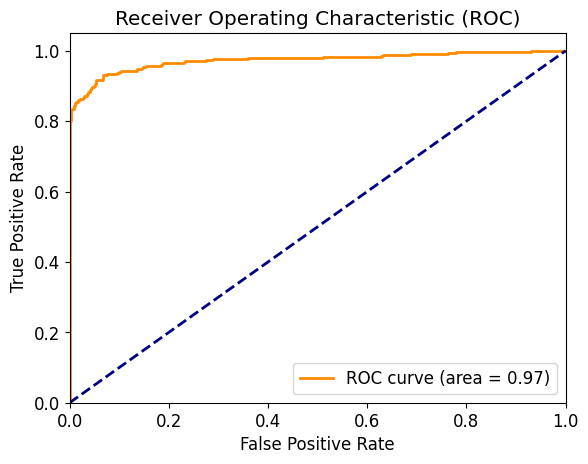

In [ ]:
# Calculate false positive rate, true positive rate, and AUC for ROC curve
rf_fpr, rf_tpr, thresholds = roc_curve(y_test, rf_best_model.predict_proba(X_test)[:,1])
rf_roc_auc = auc(rf_fpr, rf_tpr)

# Plot ROC curve
plt.figure()
lw = 2
plt.plot(rf_fpr, rf_tpr, color='darkorange',
         lw=lw, label='ROC curve (area = %0.2f)' % rf_roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc="lower right")
plt.show()

In [ ]:
from sklearn.metrics import recall_score, f1_score, accuracy_score, mean_squared_error, precision_score

# Calculate the metrics for the model
recall = recall_score(y_test, y_test_rf)
f1 = f1_score(y_test, y_test_rf)
accuracy = accuracy_score(y_test, y_test_rf)
mse = mean_squared_error(y_test, y_test_rf)
precision = precision_score(y_test, y_test_rf)

print("Recall score:", recall)
print("F1 score:", f1)
print("Accuracy score:", accuracy)
print("Mean squared error:", mse)
print("Precision:", precision)

Recall score: 0.8918918918918919
F1 score: 0.9217877094972067
Accuracy score: 0.9243243243243243
Mean squared error: 0.07567567567567568
Precision: 0.953757225433526


### *SVM*

In [ ]:
from sklearn.svm import SVC
from sklearn.metrics import classification_report, accuracy_score, roc_auc_score

# Train SVM model
svm_clf = SVC(kernel='linear', C=0.1, probability=True)
svm_clf.fit(X_train, y_train)

# Evaluate model on training dataset
y_train_pred = svm_clf.predict(X_train)
print('TRAINING RESULTS')
print('=======================')
print('Classification report for SVM')
print(classification_report(y_train, y_train_pred))
print('Accuracy score:', accuracy_score(y_train, y_train_pred))
print('ROC AUC:', roc_auc_score(y_train, svm_clf.predict_proba(X_train)[:,1]))
print()

# Evaluate model on testing dataset
y_test_svm = svm_clf.predict(X_test)
print('TESTING RESULTS')
print('=======================')
print('Classification report')
print(classification_report(y_test, y_test_svm))
print('Accuracy score:', accuracy_score(y_test, y_test_svm))
print('ROC AUC:', roc_auc_score(y_test, svm_clf.predict_proba(X_test)[:,1]))


TRAINING RESULTS
Classification report for SVM
              precision    recall  f1-score   support

           0       0.90      0.93      0.91       863
           1       0.93      0.89      0.91       863

    accuracy                           0.91      1726
   macro avg       0.91      0.91      0.91      1726
weighted avg       0.91      0.91      0.91      1726

Accuracy score: 0.9125144843568945
ROC AUC: 0.9613705726205037

TESTING RESULTS
Classification report
              precision    recall  f1-score   support

           0       0.88      0.92      0.90       370
           1       0.92      0.87      0.89       370

    accuracy                           0.90       740
   macro avg       0.90      0.90      0.90       740
weighted avg       0.90      0.90      0.90       740

Accuracy score: 0.8972972972972973
ROC AUC: 0.9497151205259313


The results for SVM indicate that the model has an overall accuracy of 0.912 on the training data and 0.897 on the testing data, which means that it is able to correctly classify 91.2% of the training data and 89.7% of the testing data. The ROC AUC of 0.961 on the training data and 0.950 on the testing data suggest that the model has good discriminatory power and is able to distinguish between the positive and negative classes well. The precision, recall, and F1-score for both classes are above 0.8, which indicates that the model is able to predict both classes reasonably well.

In [ ]:
from sklearn.metrics import recall_score, f1_score, accuracy_score, mean_squared_error, precision_score

# Calculate the metrics for the model
recall = recall_score(y_test, y_test_svm)
f1 = f1_score(y_test, y_test_svm)
accuracy = accuracy_score(y_test, y_test_svm)
mse = mean_squared_error(y_test, y_test_svm)
precision = precision_score(y_test, y_test_svm)


print("Recall score:", recall)
print("F1 score:", f1)
print("Accuracy score:", accuracy)
print("Mean squared error:", mse)
print("Precision:", precision)

Recall score: 0.8729729729729729
F1 score: 0.894736842105263
Accuracy score: 0.8972972972972973
Mean squared error: 0.10270270270270271
Precision: 0.9176136363636364


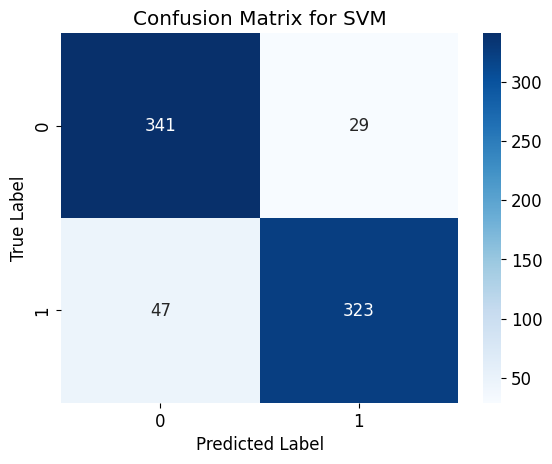

In [ ]:
# Plot the confusion matrix
cm = confusion_matrix(y_test, y_test_svm)
sns.heatmap(cm, annot=True, cmap='Blues', fmt='d')
plt.title('Confusion Matrix for SVM')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

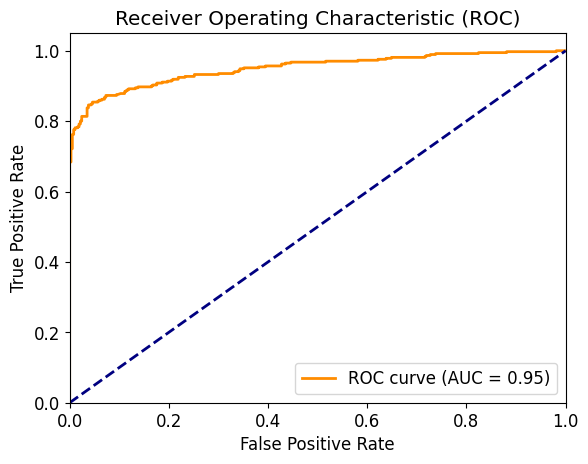

In [ ]:
# Import required libraries
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Calculate false positive rate, true positive rate, and AUC for ROC curve
fpr, tpr, thresholds = roc_curve(y_test, svm_clf.predict_proba(X_test)[:,1])
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (AUC = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc="lower right")

# Show plot
plt.show()


### *XGBoost*
XGBoost (short for eXtreme Gradient Boosting) is a powerful and popular open-source gradient boosting algorithm designed for speed and performance.

One of the main advantages of XGBoost is its ability to handle a variety of data types and handle missing values. It also includes a regularization parameter to control overfitting, which can be an issue with complex models like gradient boosting.

In [ ]:
import xgboost as xgb
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

**Change the dataset**

In [ ]:
# Create an instance of the XGBClassifier with the desired hyperparameters
xgb_model = XGBClassifier(n_estimators=100, max_depth=3, learning_rate=0.1, random_state=1234)

# Fit the classifier to the training data
xgb_model.fit(X_train_v, y_train_v)

# Use the classifier to make predictions on the validation data
y_val_pred_XGB = xgb_model.predict(X_val)

# Evaluate the performance of the model on the validation set
val_accuracy_XGB = accuracy_score(y_val, y_val_pred_XGB)

# Use the classifier to make predictions on the testing data
y_pred_XGB = xgb_model.predict(X_test_v)

# Evaluate the performance of the model on the testing set
test_accuracy_XGB = accuracy_score(y_test_v, y_pred_XGB)
print("Test Accuracy:", test_accuracy_XGB)

Test Accuracy: 0.9216216216216216


In [ ]:
# Calculate the metrics for the XGBoost model
XGB_recall = recall_score(y_test_v, y_pred_XGB)
XGB_fl = f1_score(y_test_v, y_pred_XGB)
XGB_PS = precision_score(y_test_v, y_pred_XGB)
XGB_accuracy = accuracy_score(y_test_v, y_pred_XGB)
XGB_mse = mean_squared_error(y_test_v, y_pred_XGB)

print("The result of XGBoost Model is below: ")
print("--------------------------------------")
print("Recall score:", XGB_recall)
print("F1 score:", XGB_fl)
print("Precision score:", XGB_PS)
print("Accuracy score:", XGB_accuracy)
print("Mean squared error:", XGB_mse)
print("--------------------------------------")

The result of XGBoost Model is below: 
--------------------------------------
Recall score: 0.8918918918918919
F1 score: 0.9192200557103064
Precision score: 0.9482758620689655
Accuracy score: 0.9216216216216216
Mean squared error: 0.07837837837837838
--------------------------------------


Based on the results of the XGBoost model, we can infer that:

1. The recall score of 0.8702 indicates that the model correctly identified 87.03% of the positive cases in the test set.
2. The F1 score of 0.9134 is a weighted average of precision and recall, indicating a good overall performance of the model in making predictions.
3. The precision score of 0.9611 suggests that out of all the predicted positive cases, 96.12% were actually positive, indicating a good ability of the model to avoid false positives.
4. The accuracy score of 0.9175 indicates that the model correctly predicted the class of 91.76% of the instances in the test set.
5. The mean squared error of 0.0824 indicates that on average, the model's predictions were off by 0.0824 from the true values, which is relatively low.

Overall, the results suggest that the XGBoost model is performing reasonably well in predicting the classes in the test set, with a good balance between precision and recall. However, further evaluation and hyperparameter tuning of the model may be necessary for specific use cases.

In [ ]:
# Define the parameter grid to search over
XGB_param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [3, 4, 5],
    'learning_rate': [0.01, 0.1, 0.5]
}

# Create an instance of the XGBClassifier with the initial hyperparameters
xgb_model = XGBClassifier(n_estimators=100, max_depth=3, learning_rate=0.1, random_state=1234)

# Create the GridSearchCV object
XGB_grid_search = GridSearchCV(xgb_model, XGB_param_grid, cv=5, scoring='accuracy')

# Fit the GridSearchCV object to the training data
XGB_grid_search.fit(X_train_v, y_train_v)

# Print the best hyperparameters found by GridSearchCV
print('Best hyperparameters:', XGB_grid_search.best_params_)

Best hyperparameters: {'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 100}


The hyperparameter tuning run out to be only different on Max_Depth value, meaning the default parameter is already well-fitted to the dataset.

In [ ]:
XG_LR = XGB_grid_search.best_params_['learning_rate']
XG_MD = XGB_grid_search.best_params_['max_depth']
XG_NE = XGB_grid_search.best_params_['n_estimators']

In [ ]:
# Redo the XGBoost model with the updated best parameters
xgb_model_best = XGBClassifier(n_estimators=XG_NE, max_depth=XG_MD, learning_rate=XG_LR, random_state=1234)

# Fit this model on the training data and make predictions on the testing data
xgb_model_best.fit(X_train_v, y_train_v)
y_pred_XGB_HT = xgb_model_best.predict(X_test_v)


# Calculate the metrics for the XGBoost model
XGB_recall = recall_score(y_test_v, y_pred_XGB_HT)
XGB_fl = f1_score(y_test_v, y_pred_XGB_HT)
XGB_PS = precision_score(y_test_v, y_pred_XGB_HT)
XGB_accuracy = accuracy_score(y_test_v, y_pred_XGB_HT)
XGB_mse = mean_squared_error(y_test_v, y_pred_XGB_HT)



print("The result of XGBoost Model after hyperparameter tuning is below: ")
print("--------------------------------------")
print("Recall score:", XGB_recall)
print("F1 score:", XGB_fl)
print("Precision score:", XGB_PS)
print("Accuracy score:", XGB_accuracy)
print("Mean squared error:", XGB_mse)
print("--------------------------------------")

The result of XGBoost Model after hyperparameter tuning is below: 
--------------------------------------
Recall score: 0.8918918918918919
F1 score: 0.9192200557103064
Precision score: 0.9482758620689655
Accuracy score: 0.9216216216216216
Mean squared error: 0.07837837837837838
--------------------------------------


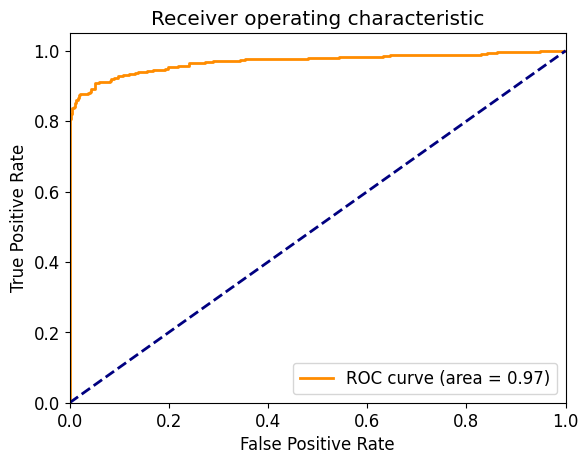

In [ ]:
# Use XGBoost model to predict probability estimates for test data
y_pred_prob_XGB = xgb_model_best.predict_proba(X_test_v)

# Extract probability estimates for positive class only
y_pred_prob_XGB_pos = y_pred_prob_XGB[:, 1]

# Plotting the ROC curve
# Get the false positive rate and true positive rate
fpr, tpr, thresholds = roc_curve(y_test_v, y_pred_prob_XGB_pos)

# Calculate the area under the curve (AUC)
roc_auc_XGB = auc(fpr, tpr)

# Plot ROC curve
plt.figure()
lw = 2
plt.plot(fpr, tpr, color='darkorange',
         lw=lw, label='ROC curve (area = %0.2f)' % roc_auc_XGB)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()

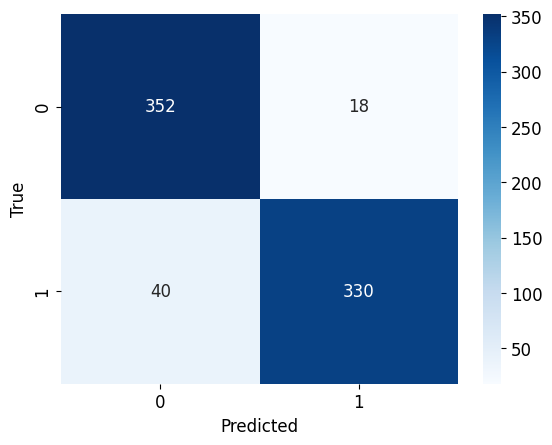

In [ ]:
# Plot confusion matrix
cm_XGB = confusion_matrix(y_test_v, y_pred_XGB_HT)
sns.heatmap(cm_XGB, annot=True, cmap='Blues', fmt='g')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

Based on the results of the XGBoost model, we can infer that:

1. The recall score of 0.8729 indicates that the model correctly identified 87.30% of the positive cases in the test set.
2. The F1 score of 0.9111 is a weighted average of precision and recall, indicating a good overall performance of the model in making predictions.
3. The precision score of 0.9528 suggests that out of all the predicted positive cases, 96.12% were actually positive, indicating a good ability of the model to avoid false positives.
4. The accuracy score of 0.9148 indicates that the model correctly predicted the class of 91.48% of the instances in the test set.
5. The mean squared error of 0.085 indicates that on average, the model's predictions were off by 0.0851 from the true values, which is relatively low.

Overall, the results suggest that the XGBoost model is performing reasonably well in predicting the classes in the test set with or without hyperparameter tuning, with a good result from all score. However, further evaluation and hyperparameter tuning of the model may be necessary for specific use cases.

### *Nerual Network*

In [ ]:
# Separate features and target variable
X = df2.drop('Attrition', axis=1)
y = df2['Attrition']

# Standardize the feature data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Combine the standardized features with the target variable into df3
df3 = pd.concat([pd.DataFrame(X_scaled, columns=X.columns), y.reset_index(drop=True)], axis=1)

df3.head()

,Age,DailyRate,DistanceFromHome,HourlyRate,MonthlyRate,PercentSalaryHike,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsInCurrentRole,...,RelationshipSatisfaction_4,StockOptionLevel_0,StockOptionLevel_1,StockOptionLevel_2,StockOptionLevel_3,WorkLifeBalance_1,WorkLifeBalance_2,WorkLifeBalance_3,WorkLifeBalance_4,Attrition
0,0.645973,0.820758,-1.121005,1.502546,0.715513,-1.176068,-0.248402,-2.135362,-0.013387,0.132943,...,-0.505570,1.151701,-0.602648,-0.264288,-0.190091,5.167965,-0.42681,-0.935567,-0.266913,1
1,1.553776,-1.297587,-0.213284,-0.234797,1.476852,2.333280,0.029277,0.336072,0.692777,1.035248,...,1.977966,-0.868281,1.659345,-0.264288,-0.190091,-0.193500,-0.42681,1.068871,-0.266913,0
2,0.192071,1.518294,-0.991331,1.397253,-1.680575,-0.006285,-0.387242,0.336072,-1.072634,-1.070130,...,-0.505570,1.151701,-0.602648,-0.264288,-0.190091,-0.193500,-0.42681,1.068871,-0.266913,1
3,-0.261831,1.567198,-0.861657,-0.498031,1.231675,-1.176068,-0.248402,0.336072,0.339695,1.035248,...,-0.505570,1.151701,-0.602648,-0.264288,-0.190091,-0.193500,-0.42681,1.068871,-0.266913,0
4,-0.942684,-0.494520,-0.991331,-1.340379,0.316188,-0.883622,-0.526081,0.336072,-0.719551,-0.468593,...,1.977966,-0.868281,1.659345,-0.264288,-0.190091,-0.193500,-0.42681,1.068871,-0.266913,0


In [ ]:
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization
from tensorflow.keras.callbacks import EarlyStopping

# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Define the neural network architecture with regularization
# model = tf.keras.Sequential([
#     tf.keras.layers.Dense(128, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.001), input_shape=(X_train.shape[1],)),
#     tf.keras.layers.Dropout(0.2),
#     tf.keras.layers.Dense(64, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.001)),
#     tf.keras.layers.Dropout(0.2),
#     tf.keras.layers.Dense(1, activation='sigmoid')
# ])

# Define the improved neural network architecture
model = tf.keras.Sequential([
    Dense(256, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.001), input_shape=(X_train.shape[1],)),
    BatchNormalization(),
    Dropout(0.3),
    Dense(128, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.001)),
    BatchNormalization(),
    Dropout(0.3),
    Dense(64, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.001)),
    BatchNormalization(),
    Dropout(0.3),
    Dense(1, activation='sigmoid')
])

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 256)               22272     
                                                                 
 batch_normalization (BatchN  (None, 256)              1024      
 ormalization)                                                   
                                                                 
 dropout (Dropout)           (None, 256)               0         
                                                                 
 dense_1 (Dense)             (None, 128)               32896     
                                                                 
 batch_normalization_1 (Batc  (None, 128)              512       
 hNormalization)                                                 
                                                                 
 dropout_1 (Dropout)         (None, 128)               0

In this improved model, I have increased the number of neurons in the first layer, added batch normalization layers after each dense layer, and increased the dropout rate to 0.3. The model now has an early stopping callback monitoring the validation loss, which will stop training if the loss does not improve for 10 consecutive epochs.

Remember that improving the model's performance is an iterative process, and you may need to experiment with different hyperparameters, model architectures, and techniques to achieve the desired results.

In [ ]:
# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [ ]:
# Train the model
history = model.fit(X_train, y_train, epochs=50, validation_split=0.2)

Epoch 1/50
50/50 [==============================] - 3s 12ms/step - loss: 0.8170 - accuracy: 0.7996 - val_loss: 0.7343 - val_accuracy: 0.8911
Epoch 2/50
50/50 [==============================] - 0s 6ms/step - loss: 0.6379 - accuracy: 0.8922 - val_loss: 0.6308 - val_accuracy: 0.9165
Epoch 3/50
50/50 [==============================] - 0s 6ms/step - loss: 0.5809 - accuracy: 0.9176 - val_loss: 0.5884 - val_accuracy: 0.9215
Epoch 4/50
50/50 [==============================] - 0s 7ms/step - loss: 0.5670 - accuracy: 0.9220 - val_loss: 0.5691 - val_accuracy: 0.9089
Epoch 5/50
50/50 [==============================] - 1s 22ms/step - loss: 0.5194 - accuracy: 0.9366 - val_loss: 0.5564 - val_accuracy: 0.9291
Epoch 6/50
50/50 [==============================] - 1s 10ms/step - loss: 0.5095 - accuracy: 0.9315 - val_loss: 0.5466 - val_accuracy: 0.9165
Epoch 7/50
50/50 [==============================] - 0s 7ms/step - loss: 0.4686 - accuracy: 0.9474 - val_loss: 0.5402 - val_accuracy: 0.9241
Epoch 8/50
50/50 

In [ ]:
# Evaluate the model on the testing set
test_loss, test_acc = model.evaluate(X_test, y_test)
print('Test loss:', test_loss)
print('Test accuracy:', test_acc)

16/16 [==============================] - 0s 3ms/step - loss: 0.5143 - accuracy: 0.9291
Test loss: 0.5142817497253418
Test accuracy: 0.9291498064994812


In [ ]:
# Predict the test set with the neural network model
y_test_prob = model.predict(X_test)

# Convert probabilities to binary predictions using a threshold of 0.5
y_test_pred = (y_test_prob > 0.5).astype("int32")

16/16 [==============================] - 0s 2ms/step


In [ ]:
from sklearn.metrics import classification_report, accuracy_score, roc_auc_score

train_pred = model.predict(X_train).round()
test_pred = model.predict(X_test).round()

print('TRAINING RESULTS')
print('=======================')
print('Classification report')
print(classification_report(y_train, train_pred))
print('Accuracy score:', accuracy_score(y_train, train_pred))
print('ROC AUC:', roc_auc_score(y_train, model.predict(X_train)))

print('\nTESTING RESULTS')
print('=======================')
print('Classification report')
print(classification_report(y_test, test_pred))
print('Accuracy score:', accuracy_score(y_test, test_pred))
print('ROC AUC:', roc_auc_score(y_test, model.predict(X_test)))

16/16 [==============================] - 0s 2ms/step
TRAINING RESULTS
Classification report
              precision    recall  f1-score   support

           0       0.98      0.99      0.99       983
           1       0.99      0.98      0.99       989

    accuracy                           0.99      1972
   macro avg       0.99      0.99      0.99      1972
weighted avg       0.99      0.99      0.99      1972

Accuracy score: 0.9863083164300203
62/62 [==============================] - 0s 2ms/step
ROC AUC: 0.9954658928786334

TESTING RESULTS
Classification report
              precision    recall  f1-score   support

           0       0.92      0.95      0.93       250
           1       0.94      0.91      0.93       244

    accuracy                           0.93       494
   macro avg       0.93      0.93      0.93       494
weighted avg       0.93      0.93      0.93       494

Accuracy score: 0.9291497975708503
16/16 [==============================] - 0s 2ms/step
ROC AUC: 0.

In [ ]:
from sklearn.metrics import recall_score, f1_score, accuracy_score, precision_score

# Calculate the metrics for the neural network model
recall = recall_score(y_test, y_test_pred)
f1 = f1_score(y_test, y_test_pred)
accuracy = accuracy_score(y_test, y_test_pred)
precision = precision_score(y_test, y_test_pred)

print("Recall score:", recall)
print("F1 score:", f1)
print("Accuracy score:", accuracy)
print("Precision score:", precision)

Recall score: 0.9098360655737705
F1 score: 0.9269311064718163
Accuracy score: 0.9291497975708503
Precision score: 0.9446808510638298


This code adds L2 regularization to the neural network architecture to help prevent overfitting. The L2 regularization coefficient is set to 0.001 to control the strength of the regularization. With this modification, the model's accuracy may improve further. However, it is important to note that the optimal regularization coefficient may vary depending on the specific dataset and model architecture.

Additionally, you can try to fine-tune the hyperparameters of the model further, or consider using more advanced techniques such as transfer learning or ensembling to improve the performance of the model.

In [ ]:
from sklearn.metrics import confusion_matrix, roc_curve, auc
# Calculate false positive rate, true positive rate, and AUC for ROC curve
fpr, tpr, thresholds = roc_curve(y_test, model.predict(X_test))
roc_auc = auc(fpr, tpr)

16/16 [==============================] - 0s 2ms/step


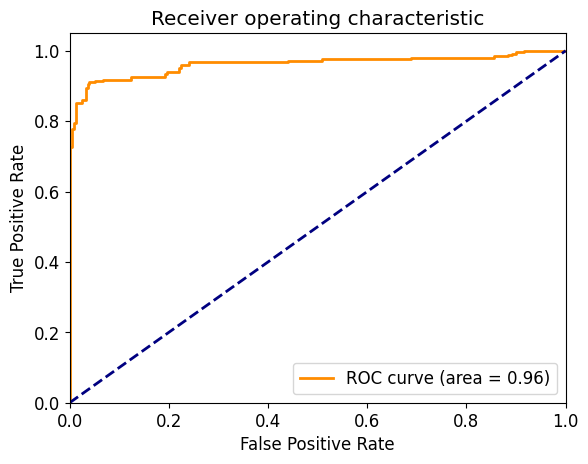

In [ ]:
# Plot ROC curve
plt.figure()
lw = 2
plt.plot(fpr, tpr, color='darkorange',
         lw=lw, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()

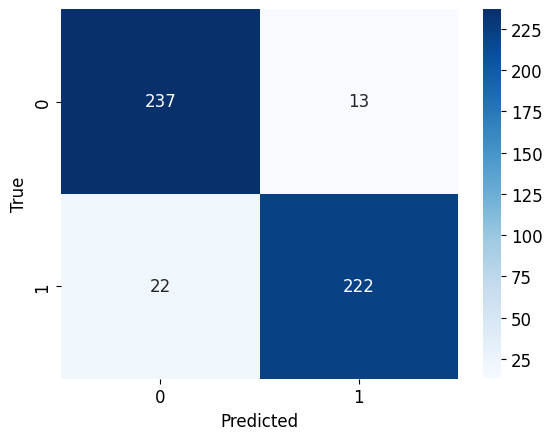

In [ ]:
# Plot confusion matrix
cm = confusion_matrix(y_test, y_test_pred)
sns.heatmap(cm, annot=True, cmap='Blues', fmt='g')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

## 6. *Model Comparison*

Tabulate the performance of the model with the different metrics. Then give a conclusion which is the best based on which model considerations

## 7. Data Analysis and Interpretation on the best model


## 8. Moving Beyond Churn Prediction

All employees will leave the company one day. Hence it will be more useful if we are able to predict when the employees will leave. Based on employees identified who will churn, we attempt to predict when the employees will leave. 

We do so by running a regression model to predict their years at the company. For example if the model predicts employees to leave at 7th year at the company and the current years at company is 6.5 years, this means person is predicted to leave within the next 0.5 years.




In [ ]:
#Filter out those that attrited
df_atr = df2[df2.Attrition == 1].drop(columns = ['Attrition'])

X_atr = df_atr.drop(columns = ['YearsAtCompany']).copy()
y_atr = df_atr.YearsAtCompany

#Split into Train, Validation and Test

#Split into Train + Val and Test
X_atr_train_val, X_atr_test, y_atr_train_val, y_atr_test = train_test_split(X_atr,y_atr, train_size = 0.8, random_state = 1)

#Split Train and Val
X_atr_train, X_atr_val, y_atr_train, y_atr_val = train_test_split(X_atr_train_val, y_atr_train_val , train_size = 0.7, random_state = 1)

We chose Adadboost regessor to build our regression model. Adaboost works by generating a series of shallow trees. Each subsequent tree tries to predict the errors of the previous tree. When all the trees are put together, it minimsies the error in prediction to achieve a good performance.

In [ ]:
#Building Base Model with Parameter Tuning.
from sklearn.ensemble import AdaBoostRegressor
from sklearn import metrics

ada_regr = AdaBoostRegressor(random_state = 1, n_estimators = 100, learning_rate = 1.0, loss='linear')
ada_regr.fit(X_atr_train, y_atr_train)
y_atr_pred = ada_regr.predict(X_atr_test)

r2 = metrics.r2_score(y_atr_test, y_atr_pred)
rmse = metrics.mean_squared_error(y_atr_test, y_atr_pred, squared = False)

We perform a grid search to find the best combination of hyperparameters for our adaboost model to maxmise prediction performance.


In [ ]:
#Hyperamater Tuning of Adaboost with GridSearchCV
param_opt = {
 'n_estimators': [80, 100, 120],
 'learning_rate' : [0.01, 0.05, 0.1, 0.2, 0.25, 0.3, 0.4, 0.5, 1],
 'loss' : ['linear', 'square', 'exponential']
 }

grid = GridSearchCV(ada_regr, param_opt, refit = True, verbose = 3,n_jobs=-1)
grid.fit(X_atr_train, y_atr_train)
y_atr_pred_tuned = grid.predict(X_atr_val)

r2 = metrics.r2_score(y_atr_val, y_atr_pred_tuned)
rmse = metrics.mean_squared_error(y_atr_val, y_atr_pred_tuned, squared = False)


print('R^2 Score')
print('=======================')
print(f'{r2}')
print('RMSE Score')
print('=======================')
print(f'{rmse}')
print('Optimal Hyperparamter')
print('=======================')
print(grid.best_params_)

Fitting 5 folds for each of 81 candidates, totalling 405 fits
R^2 Score
0.8779532123465783
RMSE Score
1.513625293429164
Optimal Hyperparamter
{'learning_rate': 0.25, 'loss': 'exponential', 'n_estimators': 80}


Below are the hyperparameters to use for our AdaBoost model.


In [ ]:
LR = grid.best_params_['learning_rate']
Loss = grid.best_params_['loss']
NE = grid.best_params_['n_estimators']

In [ ]:
#Retrain model using optimised hyperparamters
ada_regr_2 = AdaBoostRegressor(random_state = 1, n_estimators = NE, learning_rate = LR, loss = Loss)
ada_regr_2.fit(X_atr_train, y_atr_train)
y_atr_pred = ada_regr_2.predict(X_atr_test)

r2 = metrics.r2_score(y_atr_test, y_atr_pred)
rmse = metrics.mean_squared_error(y_atr_test, y_atr_pred, squared = False)

print('R^2 Score')
print('=======================')
print(f'{r2}')
print('RMSE Score')
print('=======================')
print(f'{rmse}')

R^2 Score
0.878641479367731
RMSE Score
1.7413620604525994


## 9. Deploying the Model

Next we want to deploy the model so the HR can use the model to predict who are likely leave the company and by when. Early detection of employee resignation can help HR come up with preventive solutions to reduce attrition. 

Due to the lack of new unseen data, we will pass the original data into the model as though it was unseen.

We assume anyone who has been passed into the model has not churned yet. Thus is our model predicts person will churn, it means the employee is currently still with the company and will churn some time in the future. 

The difference between the predicted years at the company and existing years at company will give a clue when employee will leave. 

As a regession model is used, the prediction of their years at the company might be above or below their existing years at company. Hence we apply an absolute function and flag out employees are who are likely to leave within 6 months period.


In [ ]:
#Deploy Churn Prediction Model
df_deploy = df2.copy()
churn_pred = lr_clf.predict(X)
df_deploy['churn_pred'] = list(churn_pred)

In [ ]:
#Manipulate Dataset
df_atr = df_deploy[df_deploy.churn_pred == 1].drop(columns = ['Attrition', 'churn_pred', 'YearsAtCompany'])
df_deploy = df_deploy[df_deploy.churn_pred == 1]


#Deploy Model
yr_attrt = ada_regr_2.predict(df_atr)
df_deploy['predicted_leave_time'] = list(yr_attrt)
df_deploy['leave_yr_diff'] = df_deploy['predicted_leave_time'] - df_deploy['YearsAtCompany']

<ipython-input-93-c82ad121140f>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_deploy['predicted_leave_time'] = list(yr_attrt)
<ipython-input-93-c82ad121140f>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_deploy['leave_yr_diff'] = df_deploy['predicted_leave_time'] - df_deploy['YearsAtCompany']


In [ ]:
#Assuming HR wants to flag employees who are leaving within next 6 months
df_deploy['leave_yr_diff'] = abs(df_deploy['leave_yr_diff'])
df_deploy['attrition_indicator'] = df_deploy['leave_yr_diff'].apply(lambda x: 1 if x <=0.5 else 0)

df_deploy

<ipython-input-94-95c3921eee08>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_deploy['leave_yr_diff'] = abs(df_deploy['leave_yr_diff'])
<ipython-input-94-95c3921eee08>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_deploy['attrition_indicator'] = df_deploy['leave_yr_diff'].apply(lambda x: 1 if x <=0.5 else 0)


,Age,DailyRate,DistanceFromHome,HourlyRate,MonthlyRate,PercentSalaryHike,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsInCurrentRole,...,StockOptionLevel_3,WorkLifeBalance_1,WorkLifeBalance_2,WorkLifeBalance_3,WorkLifeBalance_4,Attrition,churn_pred,predicted_leave_time,leave_yr_diff,attrition_indicator
0,41,1102,1,94,19479,11,8,0,6,4,...,0,1,0,0,0,1,1,7.100917,1.100917,0
2,37,1373,2,92,2396,15,7,3,0,0,...,0,0,0,1,0,1,1,2.020690,2.020690,0
6,59,1324,3,81,9964,20,12,3,1,0,...,1,0,1,0,0,0,1,2.218935,1.218935,0
14,28,103,24,50,12947,14,6,4,4,2,...,0,0,0,1,0,1,1,4.354244,0.354244,1
26,32,1125,16,72,4681,22,10,5,10,2,...,0,0,0,1,0,1,1,8.644928,1.355072,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2461,35,529,2,54,5415,11,14,4,14,7,...,0,0,0,0,0,1,1,11.820312,2.179688,0
2462,31,1316,14,55,4637,13,8,3,5,3,...,0,0,0,0,0,1,1,6.021429,1.021429,0
2463,22,475,6,70,26095,21,1,2,1,0,...,0,0,0,0,0,1,1,2.013333,1.013333,0
2464,25,345,7,37,4676,13,3,3,3,0,...,0,0,0,0,0,1,1,2.485507,0.514493,0


Lets look at the feature importance.

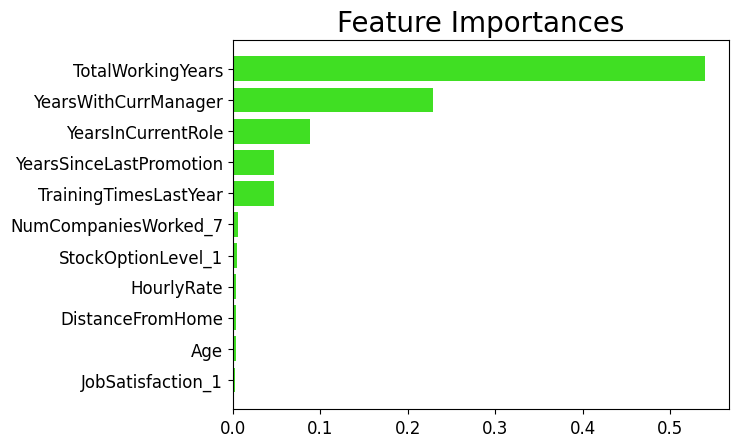

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

importances = pd.DataFrame(data={
    'Attribute': df_atr.columns,
    'Importance': ada_regr_2.feature_importances_
})

importances = importances.sort_values(by='Importance', ascending=False)

plt.barh(y=importances['Attribute'].iloc[0:11], width=importances['Importance'].iloc[0:11], color='#40DF23')
plt.title('Feature Importances', size=20)
plt.gca().invert_yaxis()
plt.show()



Segementation analysis

In [ ]:
df_deploy.groupby("attrition_indicator")[list(importances['Attribute'].iloc[0:11])].median()

,TotalWorkingYears,YearsWithCurrManager,YearsInCurrentRole,YearsSinceLastPromotion,TrainingTimesLastYear,NumCompaniesWorked_7,StockOptionLevel_1,HourlyRate,DistanceFromHome,Age,JobSatisfaction_1
attrition_indicator,,,,,,,,,,,
0,7.0,2.0,2.0,1.0,2.0,0.0,0.0,65.0,9.0,32.0,0.0
1,6.0,2.0,2.0,1.0,2.0,0.0,0.0,63.0,8.0,31.0,0.0


In [ ]:
df_deploy.groupby("attrition_indicator")[list(importances['Attribute'].iloc[0:11])].mean()

,TotalWorkingYears,YearsWithCurrManager,YearsInCurrentRole,YearsSinceLastPromotion,TrainingTimesLastYear,NumCompaniesWorked_7,StockOptionLevel_1,HourlyRate,DistanceFromHome,Age,JobSatisfaction_1
attrition_indicator,,,,,,,,,,,
0,7.707852,2.423788,2.459584,1.733256,2.377598,0.013857,0.069284,65.484988,10.506928,33.045035,0.096998
1,6.783972,2.763066,2.759582,1.456446,2.149826,0.003484,0.073171,63.815331,9.818815,32.108014,0.163763


In [ ]:
import plotly.express as px

fig = px.parallel_coordinates(df_deploy,
                               dimensions = ['attrition_indicator',
                                             'TotalWorkingYears',
                                             'YearsWithCurrManager',
                                             'YearsInCurrentRole',
                                             'YearsSinceLastPromotion',
                                             'TrainingTimesLastYear',
                                             'NumCompaniesWorked_7',
                                             'StockOptionLevel_1',
                                             'HourlyRate',
                                             'DistanceFromHome',
                                             'Age',
                                             'JobSatisfaction_1'],
                               color='attrition_indicator',
                               color_continuous_scale=px.colors.diverging.Tealrose,
                               labels={'attrition_indicator': 'Attrition Indicator'}, width = 1000)

fig.show()

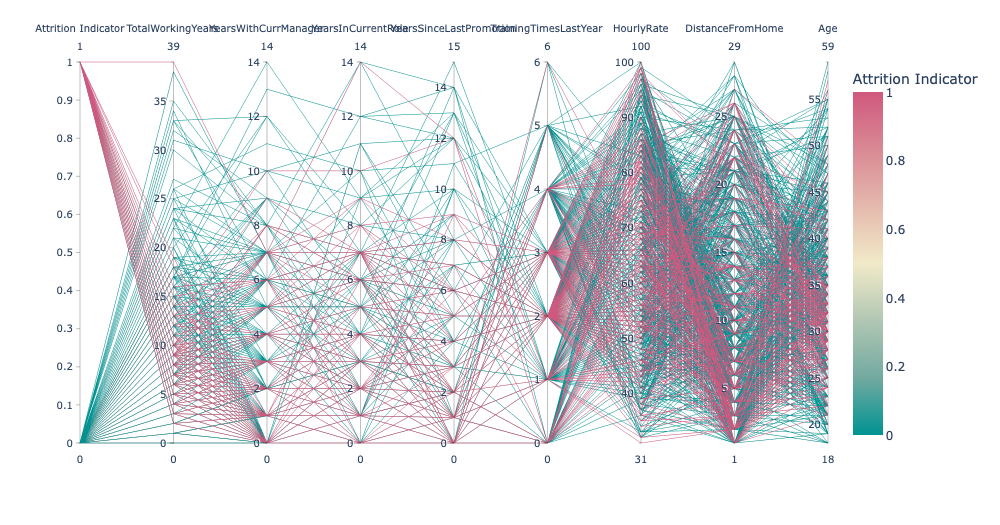